# Trabalho Computacional - Processos Estocásticos

In [1]:
!pip install numpy


You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install scipy

You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [15]:
!pip install statsmodels

     ---------------------------------------- 9.2/9.2 MB 454.2 kB/s eta 0:00:00
     ------------------------------------ 233.8/233.8 KB 716.6 kB/s eta 0:00:00
     -------------------------------------- 10.7/10.7 MB 632.5 kB/s eta 0:00:00
     -------------------------------------- 341.8/341.8 KB 1.5 MB/s eta 0:00:00
     ------------------------------------ 502.3/502.3 KB 409.1 kB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [24]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from statsmodels.graphics.tsaplots import plot_acf, acf


plt.style.use('tableau-colorblind10')
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [5]:
Fs = 10 * 10**3

def get_peak(yf, n) -> float:
    normalized = np.abs(yf) / n
    normalized[0] = 0
    return np.max(normalized)

def get_frequency(xf, yf) -> float:
    y = yf.copy()
    y[0] = 0
    return xf[np.argmax(np.abs(yf))]

def plot_time_domain(dataset, lo: float, hi: float, filename: str) -> None:
    #the window to inspect
    fig, axs = plt.subplots(len(dataset), 1, figsize=(15,15))

    for i, signal in enumerate(dataset):
        time = np.arange(lo,hi, 1/Fs)

        l1, = axs[i].plot(time, signal[lo*Fs:lo*Fs + len(time)])
        l2, = axs[i].plot(time, signal[lo*Fs:lo*Fs + len(time)] - np.mean(signal[lo*Fs:lo*Fs + len(time)]))

        axs[i].grid(True)
        axs[i].legend([l1,l2], ["Sinal", "Sinal Subtraído da Média"], loc="upper right")

    fig.suptitle(f"Análise de {filename} entre {lo:.2f}s e {hi:.2f}s", fontsize=20)
    fig.supxlabel("Tempo (segundos)")
    fig.supylabel("Sinal")
    fig.tight_layout()

    fig.savefig(f"results/{filename} - Tempo.png")

    plt.show()

def plot_frequency_domain(dataset, filename: str) -> None:
    fig, axs = plt.subplots(len(dataset), 1, figsize=(10,30))

    for i, signal in enumerate(dataset):
        N = len(signal)

        signal = signal - np.mean(signal)

        yf = fft(signal)[0:N//2]
        xf = fftfreq(N, 1/Fs)[:N//2]
        

        axs[i].set_title(f"Motor {i+1}")
        axs[i].plot(xf, np.abs(yf) / N)
        axs[i].grid(True)
        axs[i].axis(xmin = 0, xmax=120, ymin=0, ymax=1)
        
        freq = get_frequency(xf, yf)
        peak = get_peak(yf, N)
        mean = np.abs(yf[0])

        annotations = '\n'.join((
            f'- frequência = {freq:.2f} Hz',
            f'- valor de pico = {peak:.2f}',
            f'- média = {mean:.2f}'
        ))

        axs[i].text(95, 0.8, annotations, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    fig.suptitle(f"Análise de {filename} no domínio da frequência", fontsize=20)
    fig.supxlabel("Frequência (Hz)")
    fig.supylabel("Amplitude Normalizada [0-1]")
    fig.tight_layout(pad=3)

    fig.savefig(f"results/{filename} - FFT.png")

    plt.show()

In [66]:
def plot_autocorrelation(dataset, filename: str) -> None:

    fig, axs = plt.subplots(len(dataset), 1, figsize=(15,30))

    for i, signal in enumerate(dataset):
        lag_acf = acf(dataset[i], nlags=100)
        axs[i].plot(lag_acf, marker='o') 
        axs[i].set_title(f"Motor {i+1}")
        axs[i].grid(True)
        axs[i].axis(xmin = 0, xmax=100, ymin=-1, ymax=1)
        

    fig.suptitle(f"Autocorrelação {filename} ", fontsize=20)
    fig.supxlabel("Lag")
    fig.supylabel("Autocorrelação")
    fig.tight_layout(pad=3)

    fig.savefig(f"results/{filename} - Autocorr.png")

    plt.show()

In [78]:
def plot_autocorrelation2(dataset, filename: str) -> None:

    #fig, axs = plt.subplots(len(dataset), 1, figsize=(15,30))

    for i, signal in enumerate(dataset):
     plt.figure(figsize=(20,10))
     plot_acf(dataset[i], lags=50)
     plt.suptitle(f"Autocorrelação {filename} {i+1} ", fontsize=20)
     plt.xlabel("Lag")
     plt.ylabel("Autocorrelação")
     plt.tight_layout(pad=3)
     plt.show()


## Lendo os Dados

In [6]:
def read_data(path: str):
    return np.genfromtxt(path, delimiter=",")

In [7]:
Fs = 10 * 10**3

normal = read_data("data/normal.csv")
failing = read_data("data/failing.csv")
unknown = read_data("data/unknown.csv")

## Analisando Cada Conjunto

### MIT Normal

#### Análise no Tempo

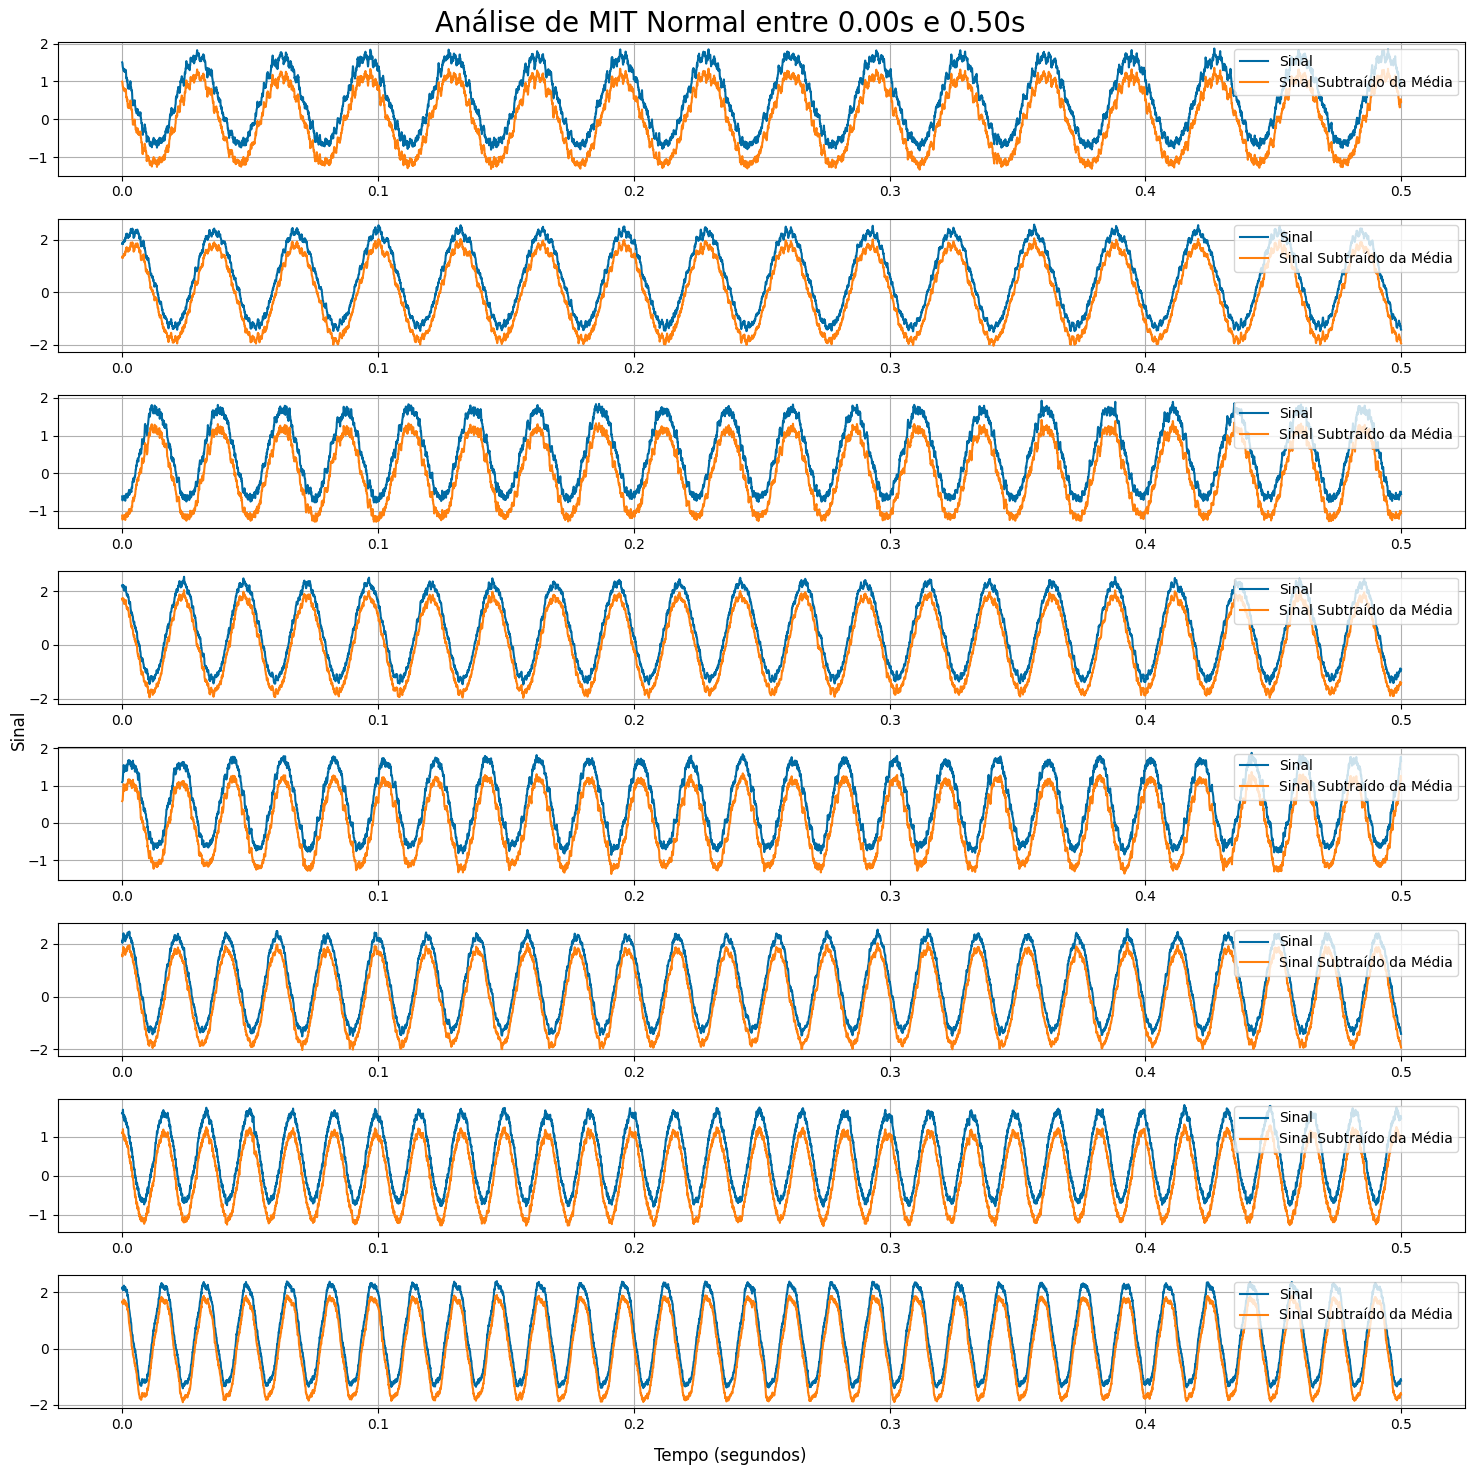

In [8]:
plot_time_domain(normal, 0, 0.5, "MIT Normal")

#### Análise na Frequência

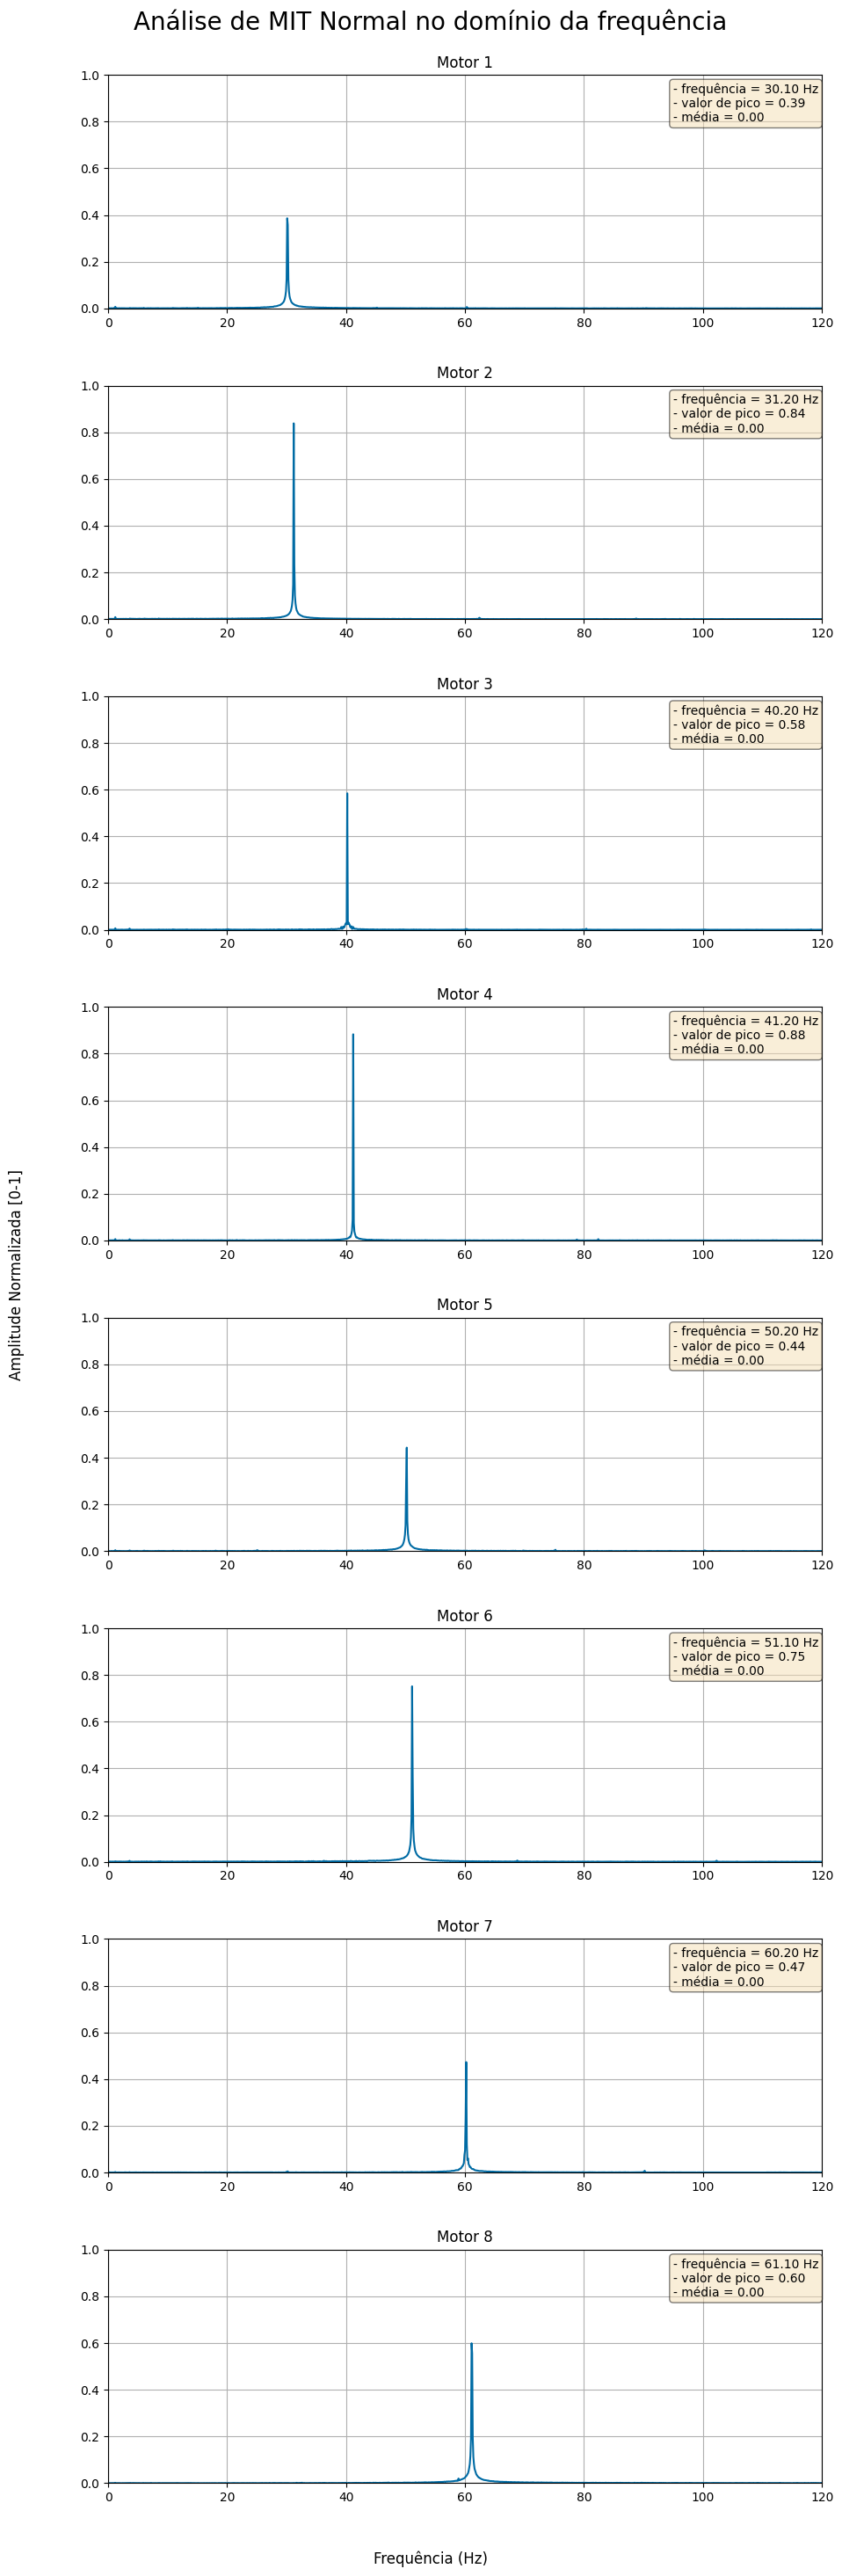

In [9]:
plot_frequency_domain(normal, "MIT Normal")

#### Função de Autocorrelação

<Figure size 2000x1000 with 0 Axes>

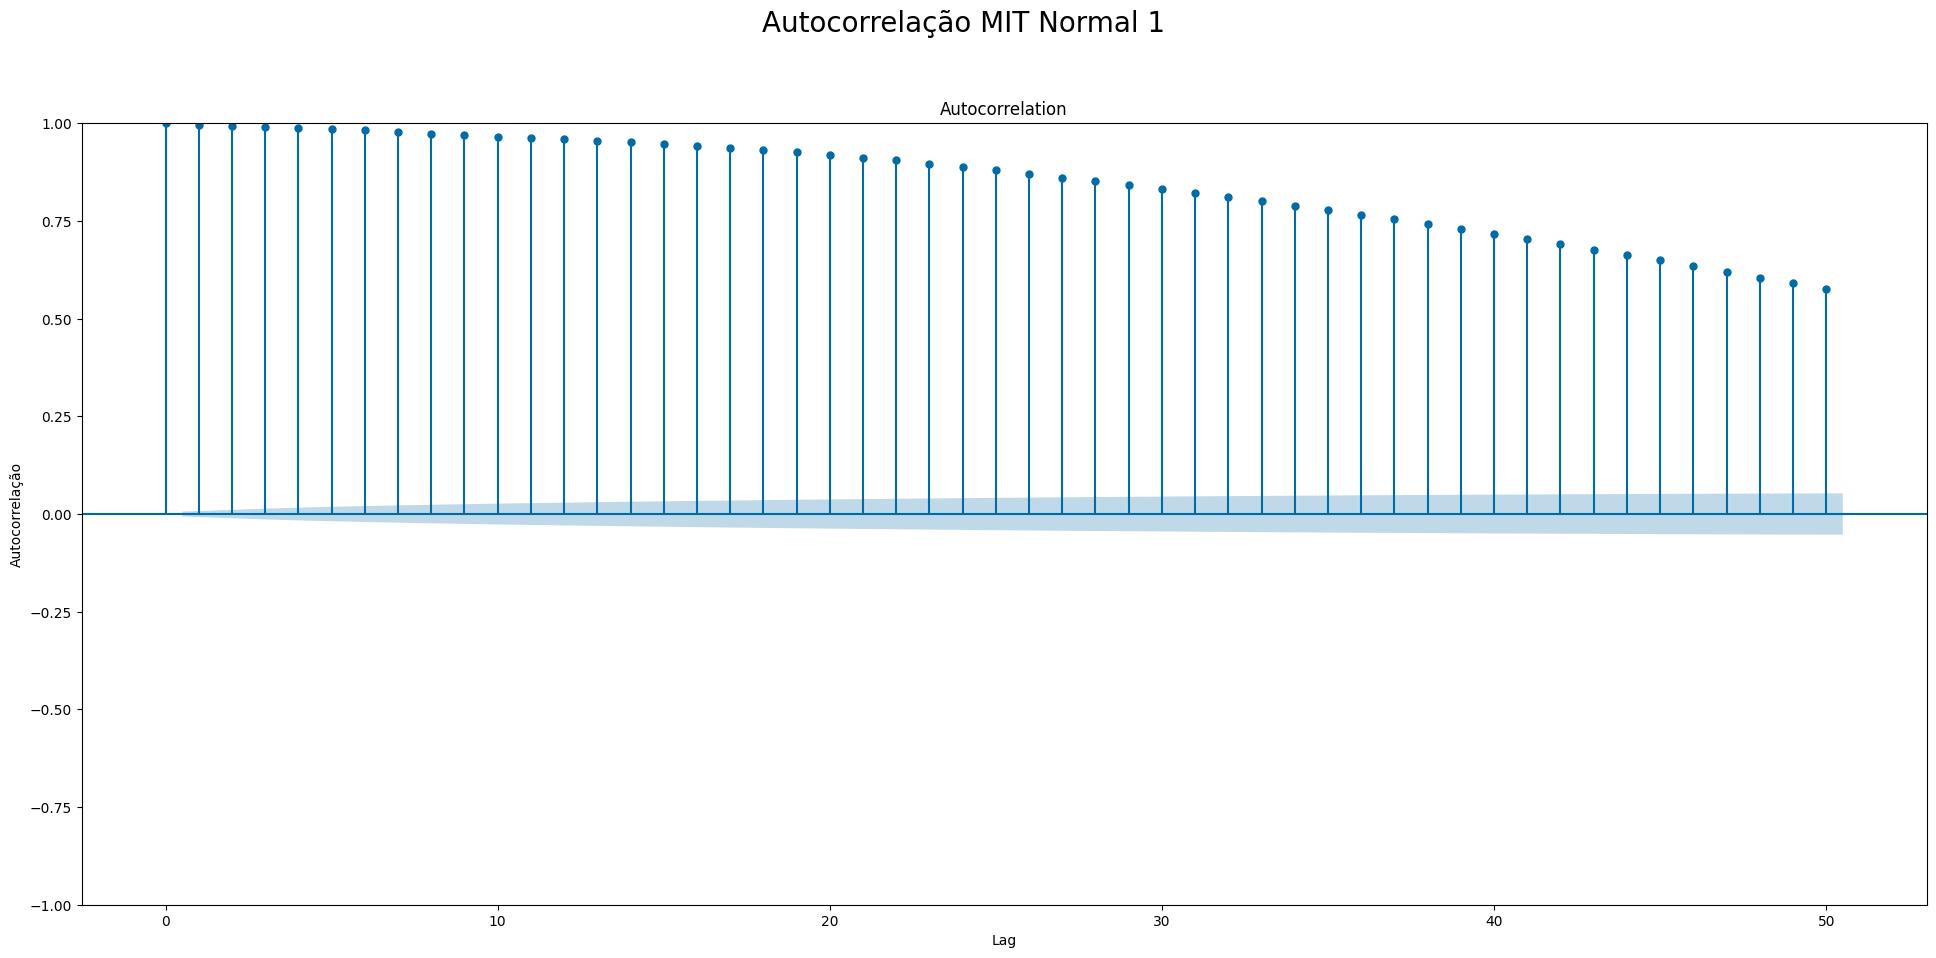

<Figure size 2000x1000 with 0 Axes>

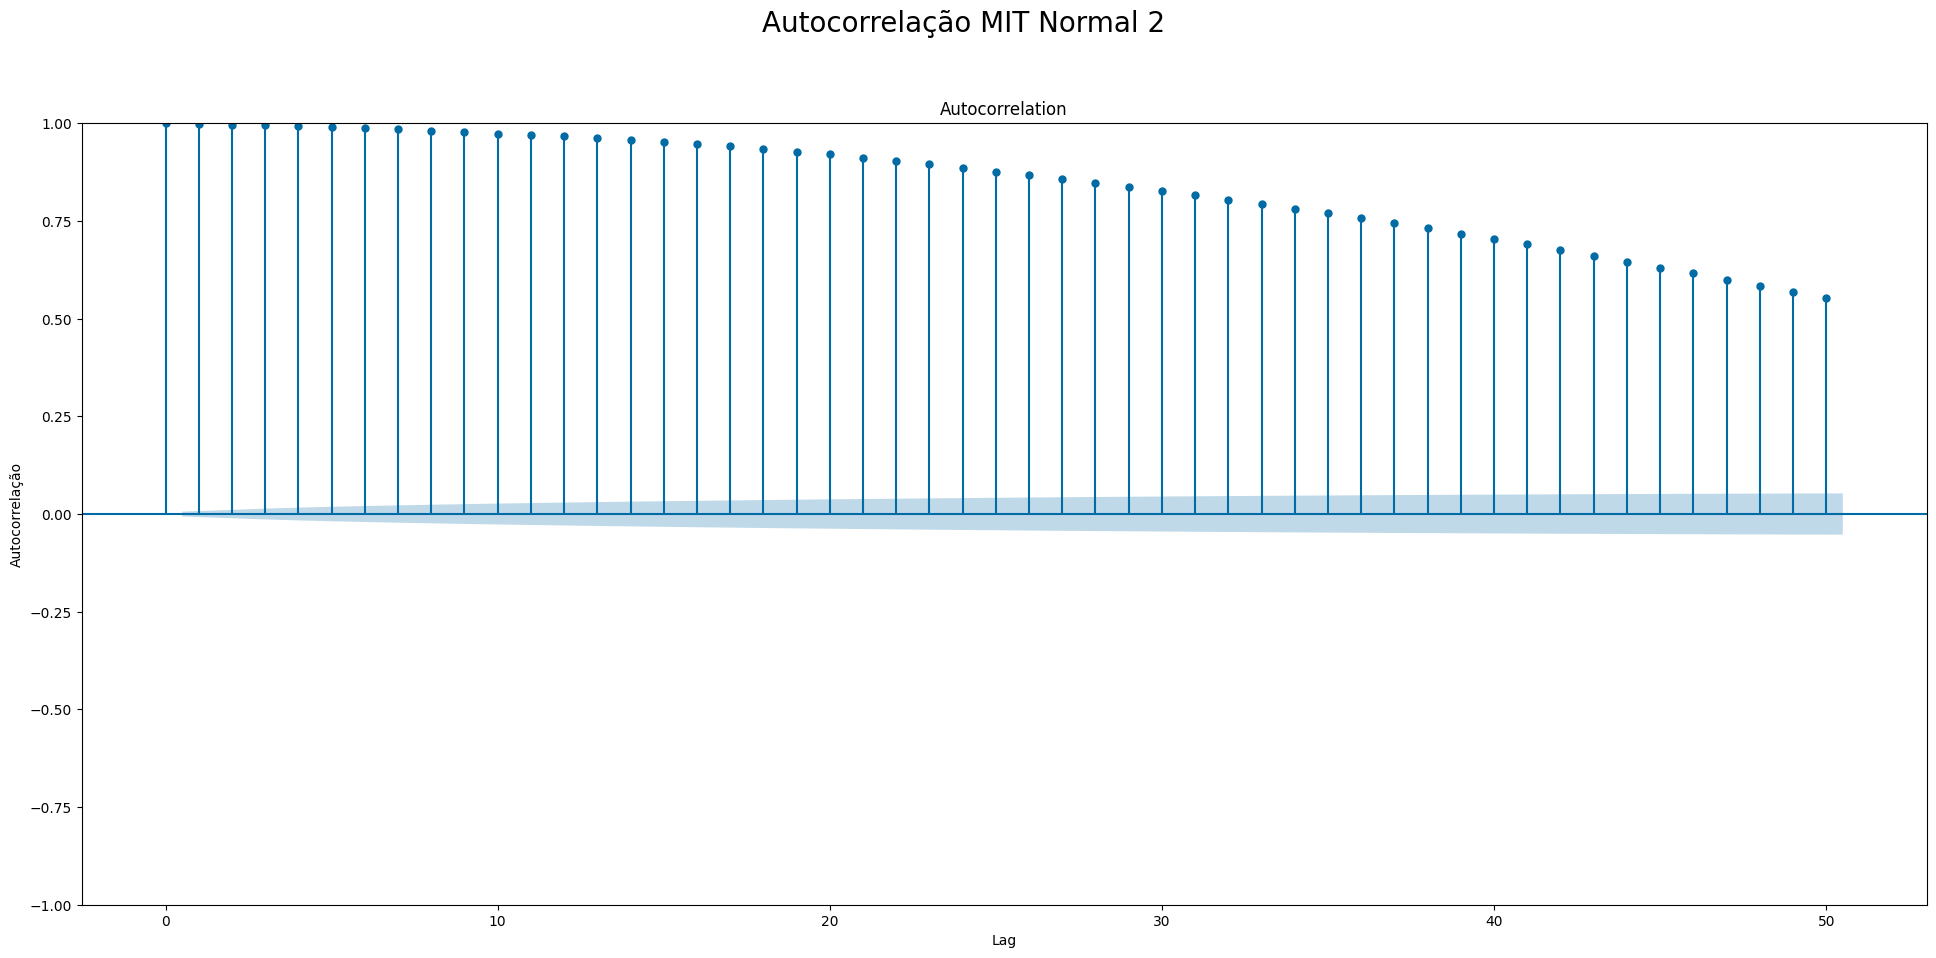

<Figure size 2000x1000 with 0 Axes>

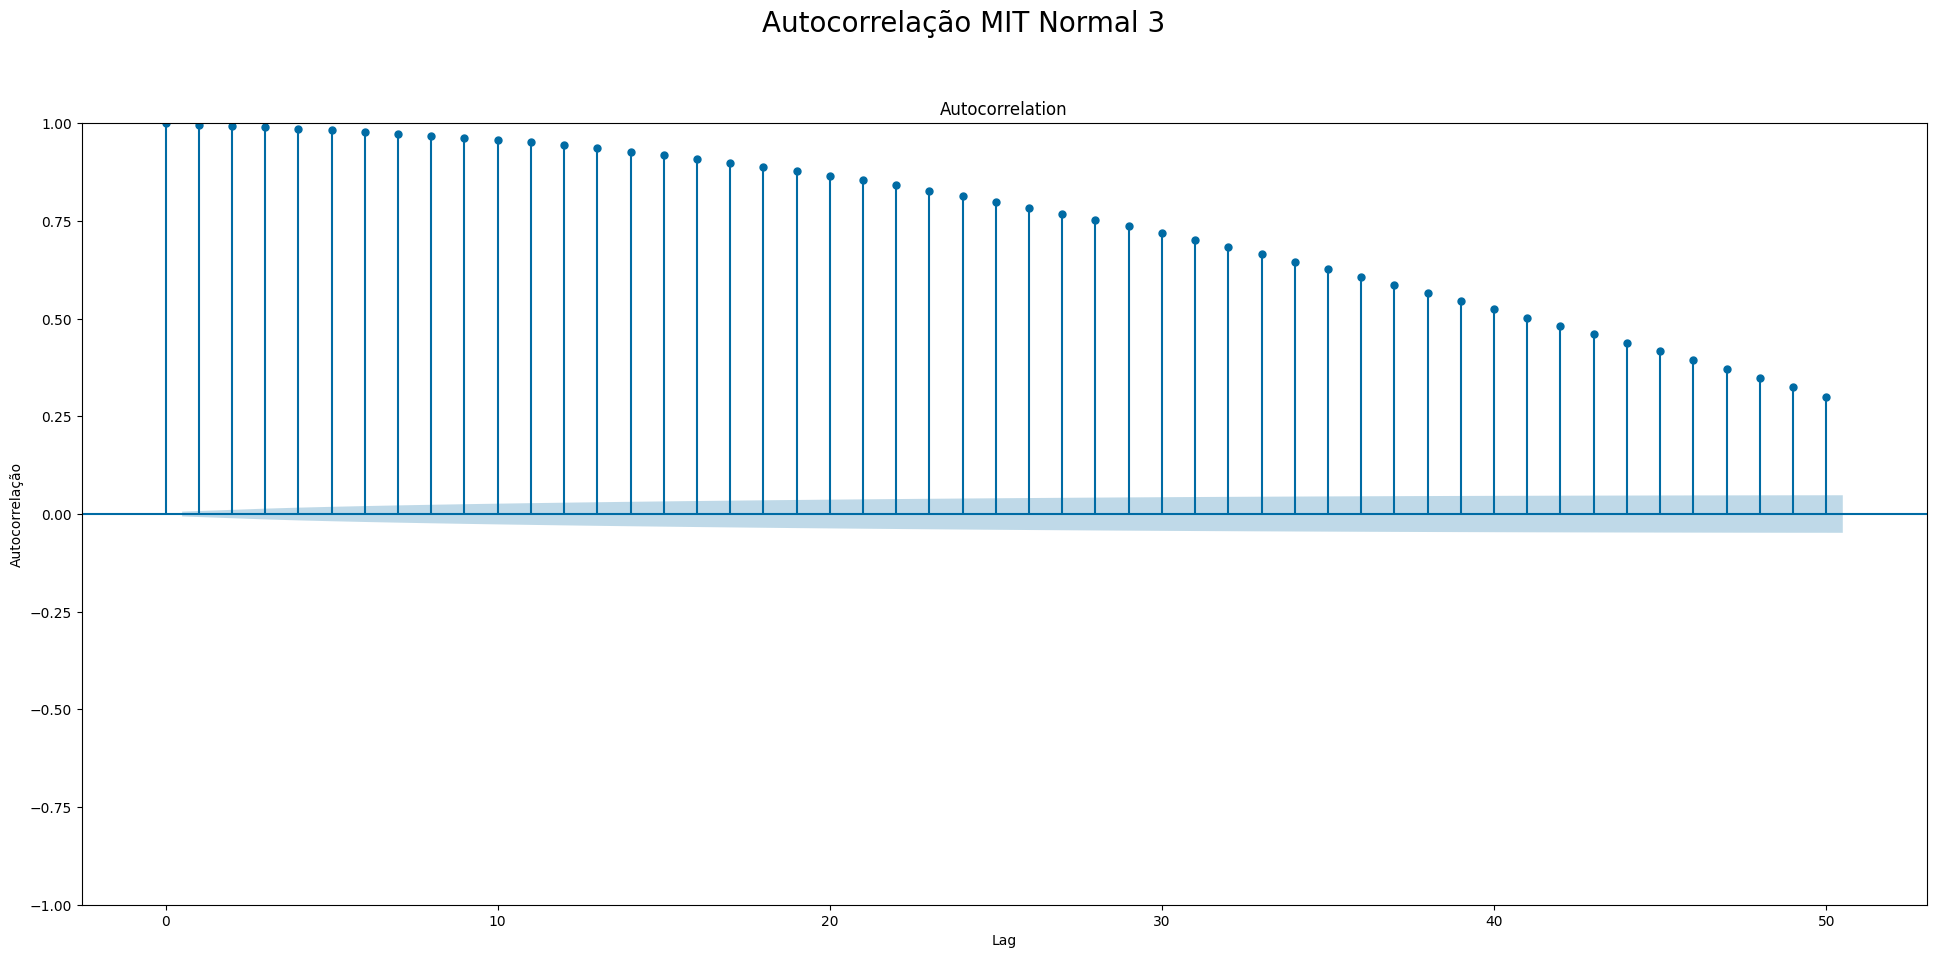

<Figure size 2000x1000 with 0 Axes>

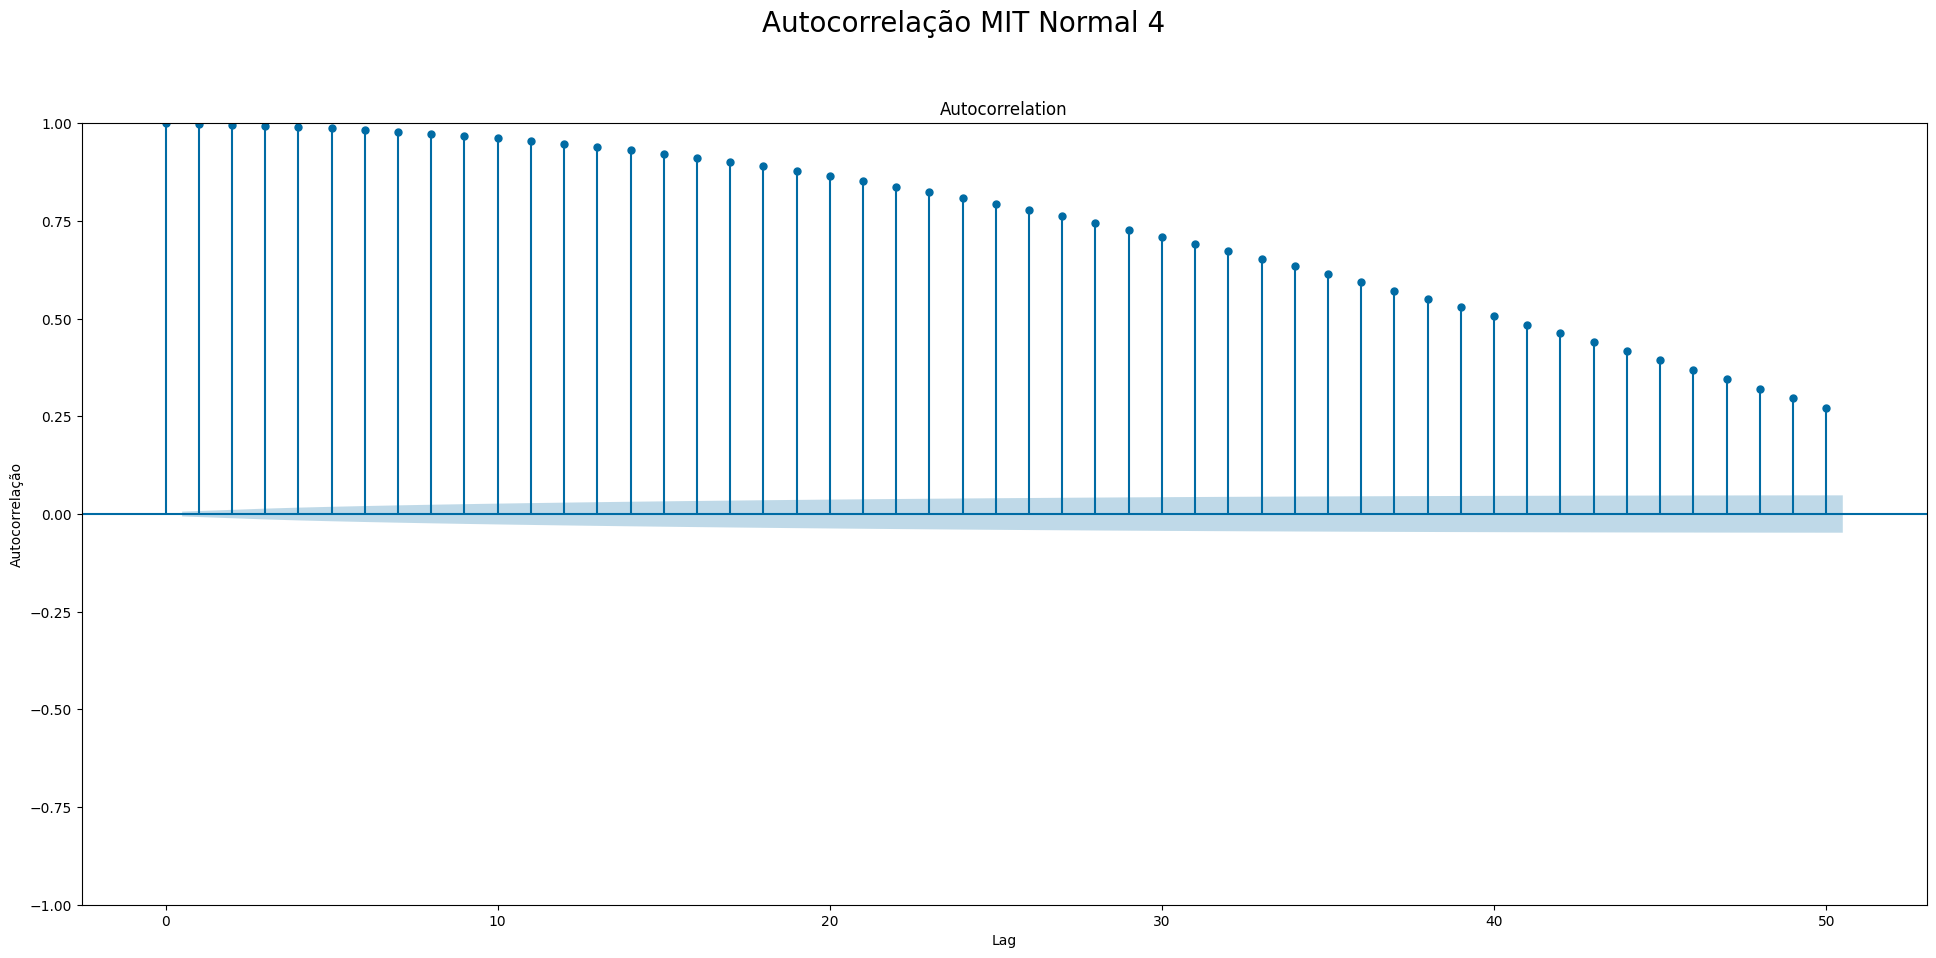

<Figure size 2000x1000 with 0 Axes>

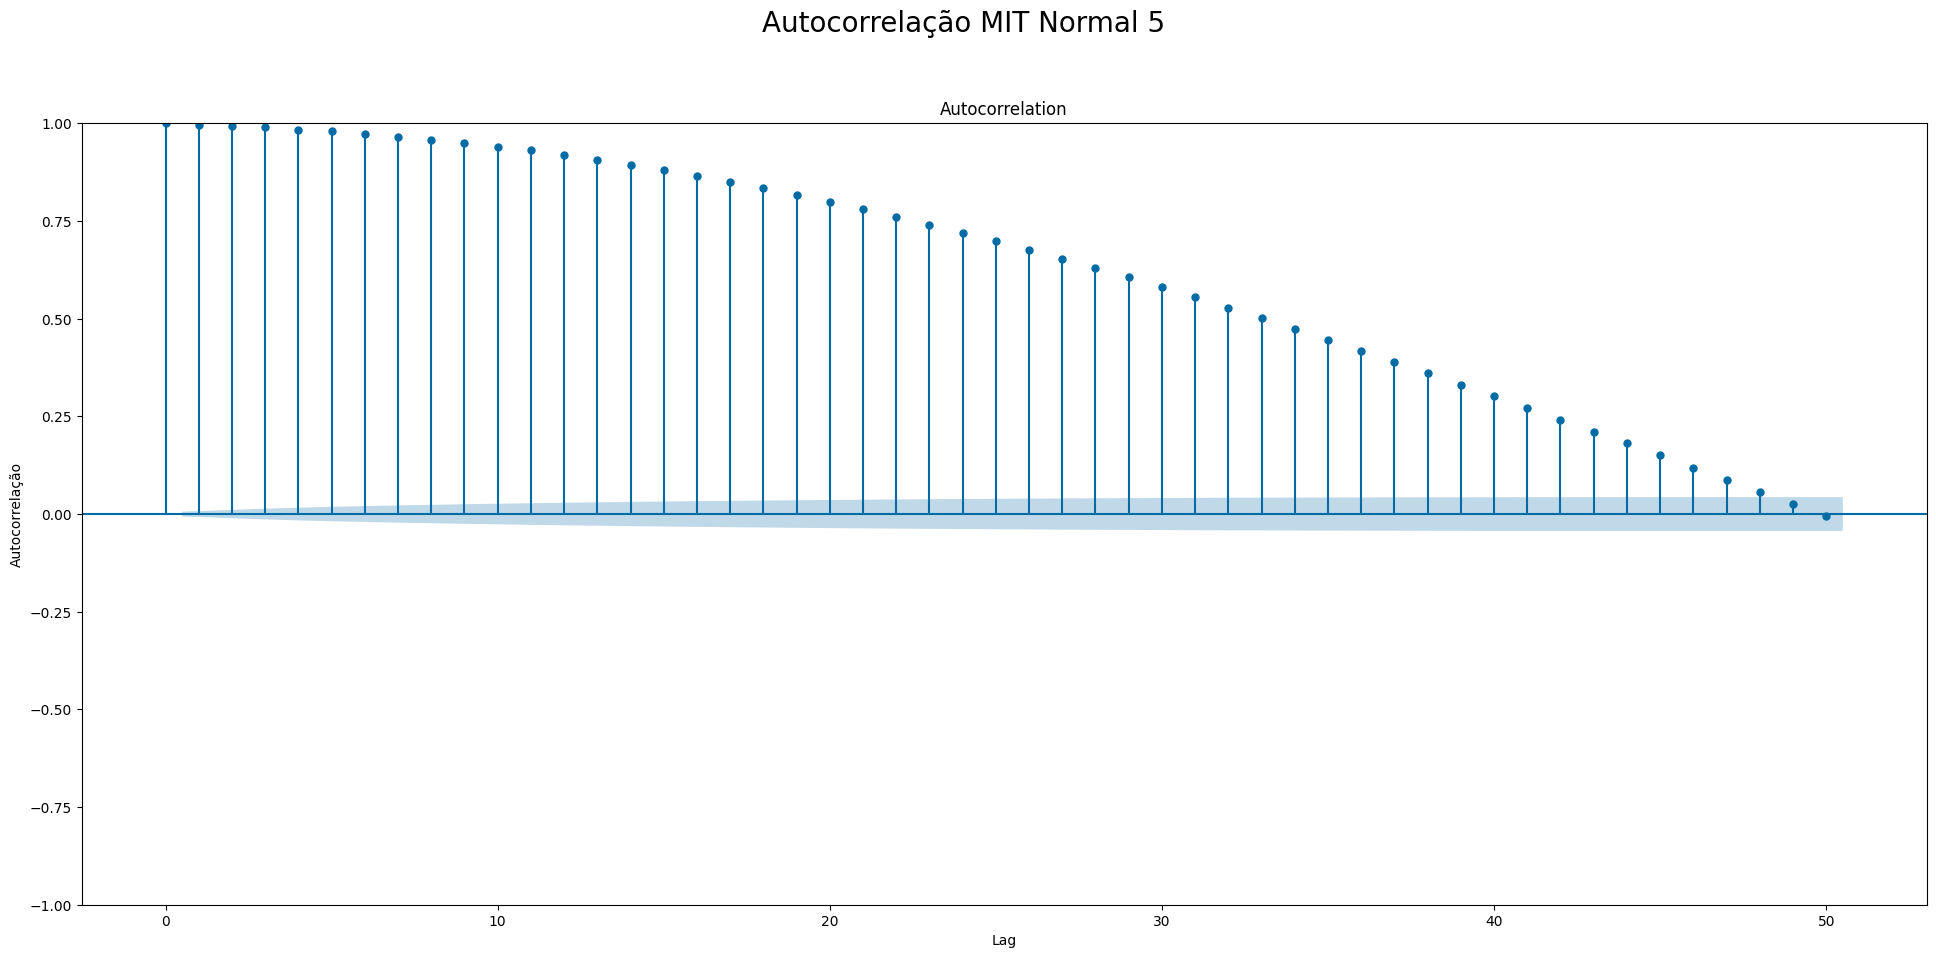

<Figure size 2000x1000 with 0 Axes>

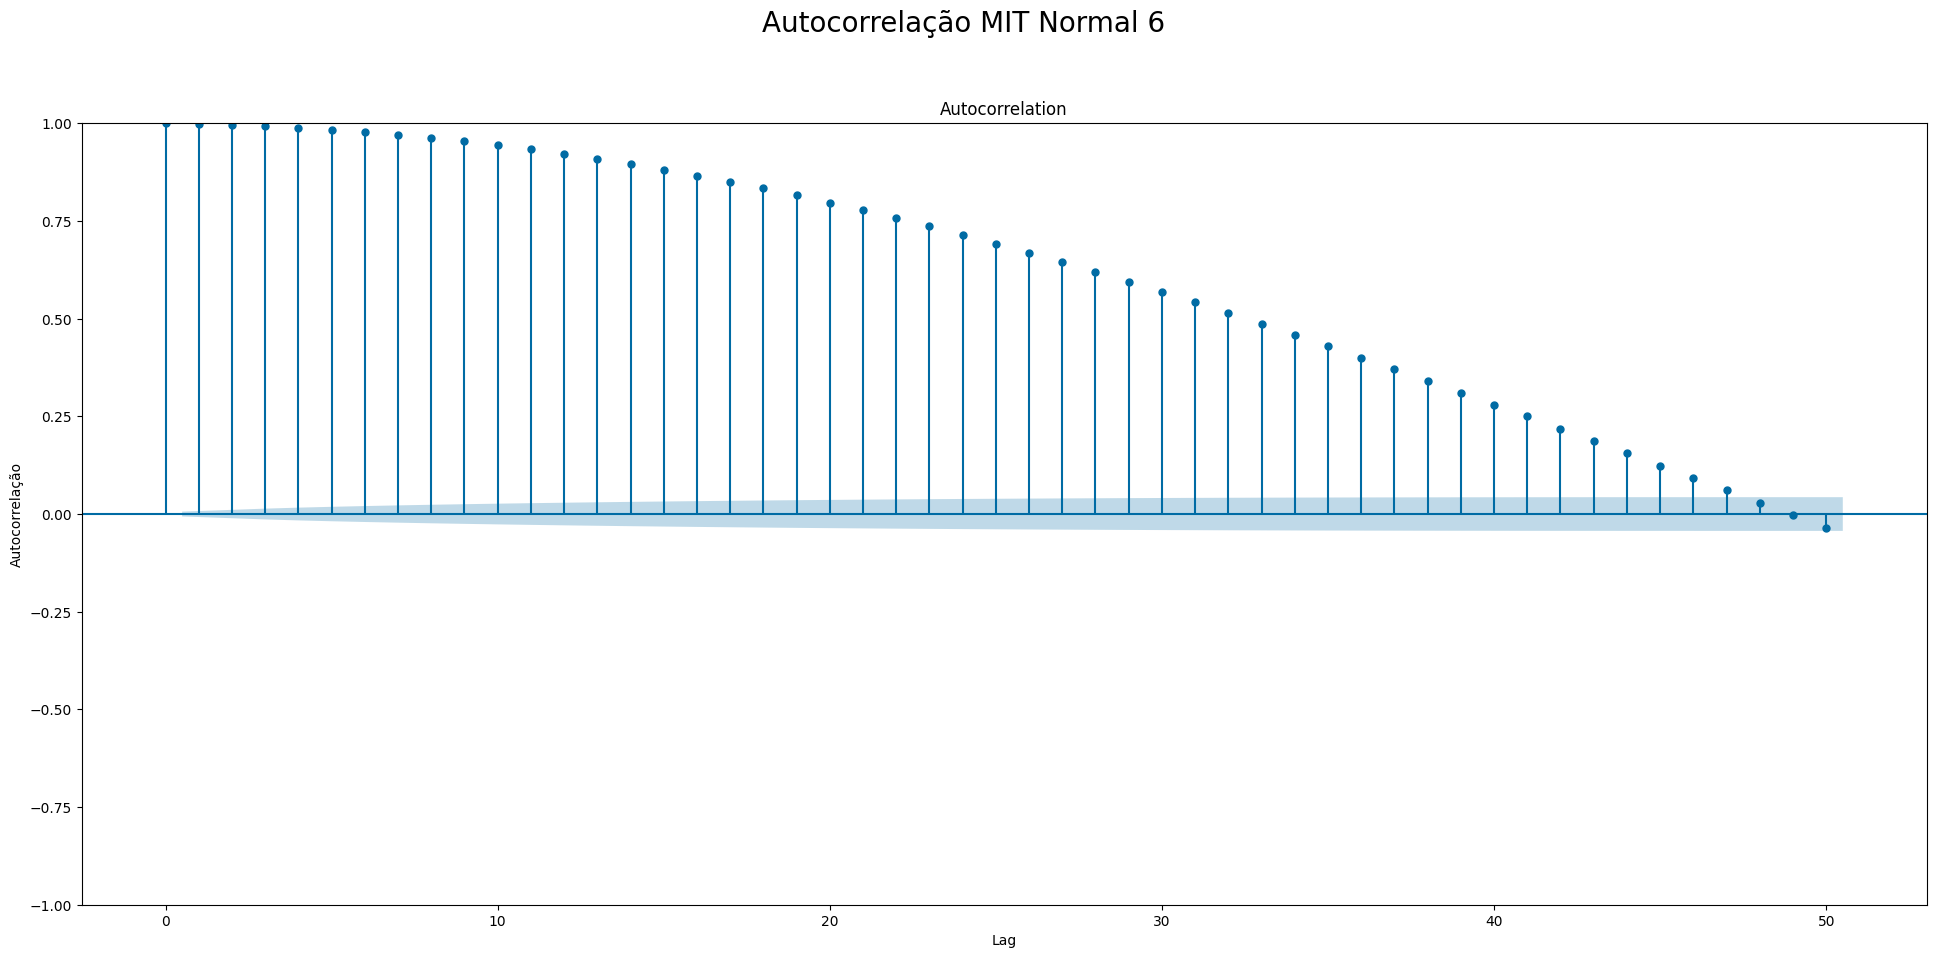

<Figure size 2000x1000 with 0 Axes>

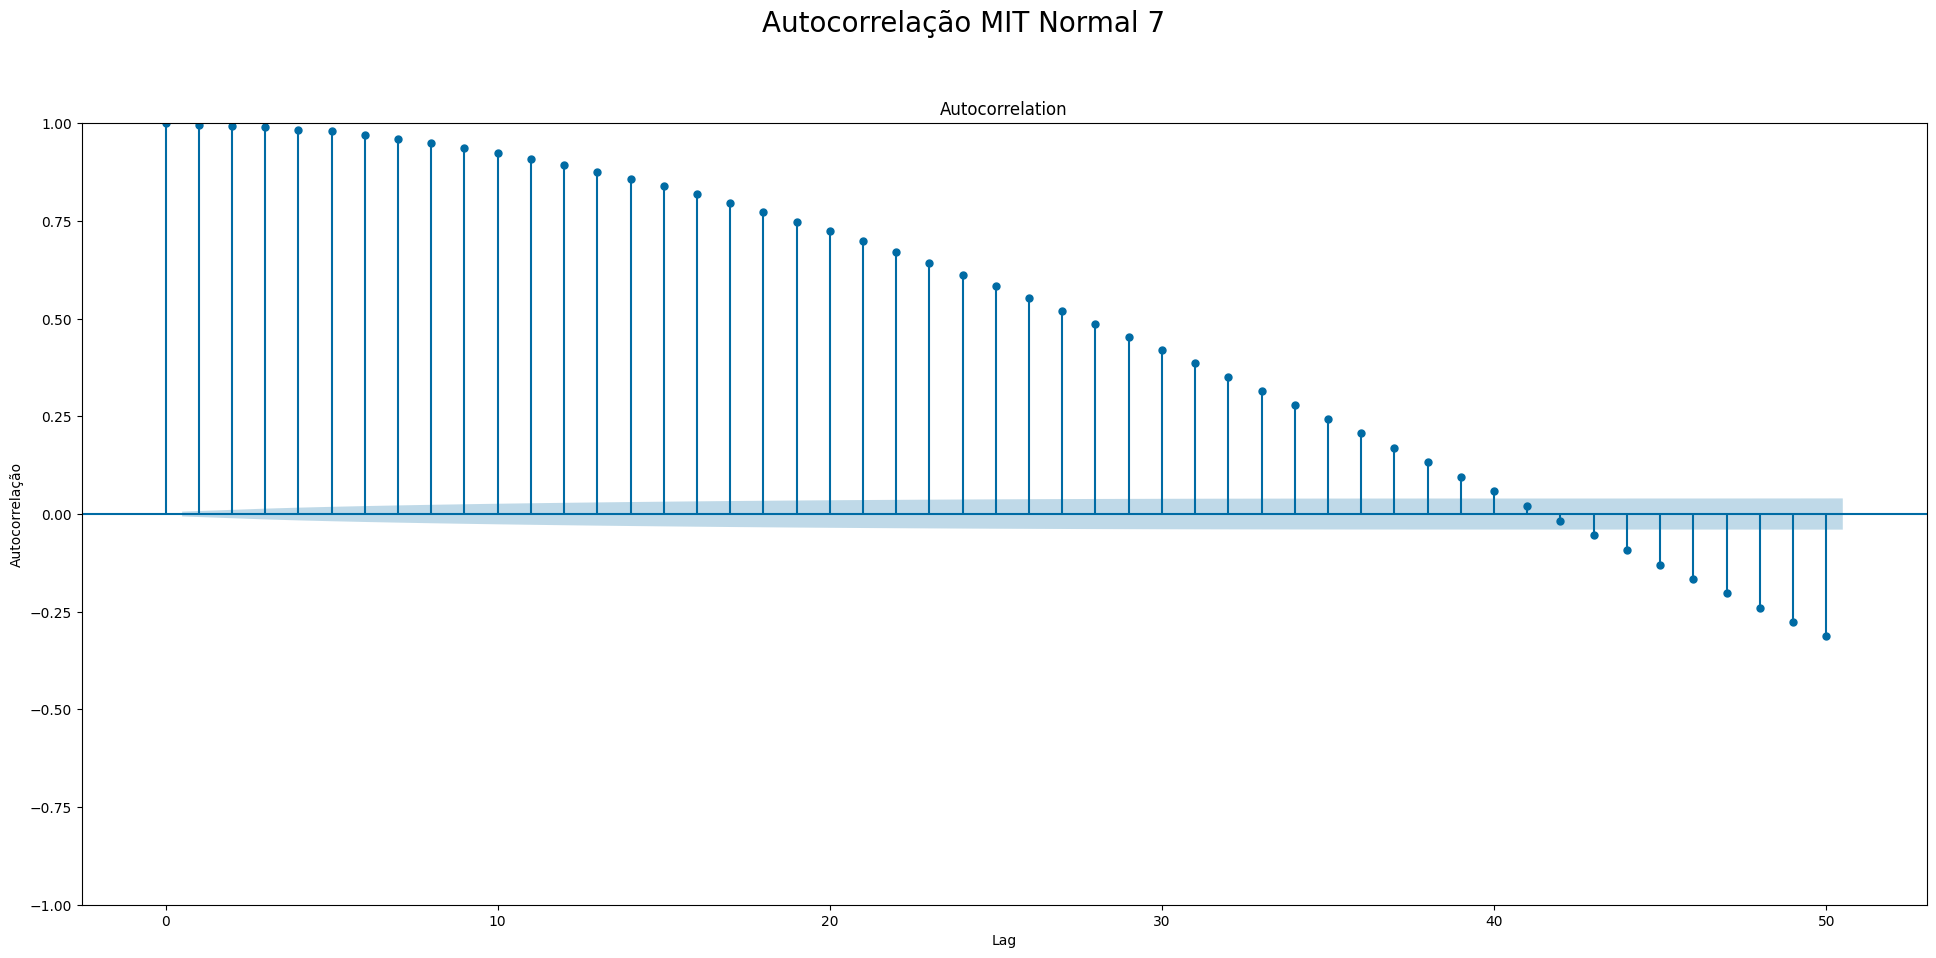

<Figure size 2000x1000 with 0 Axes>

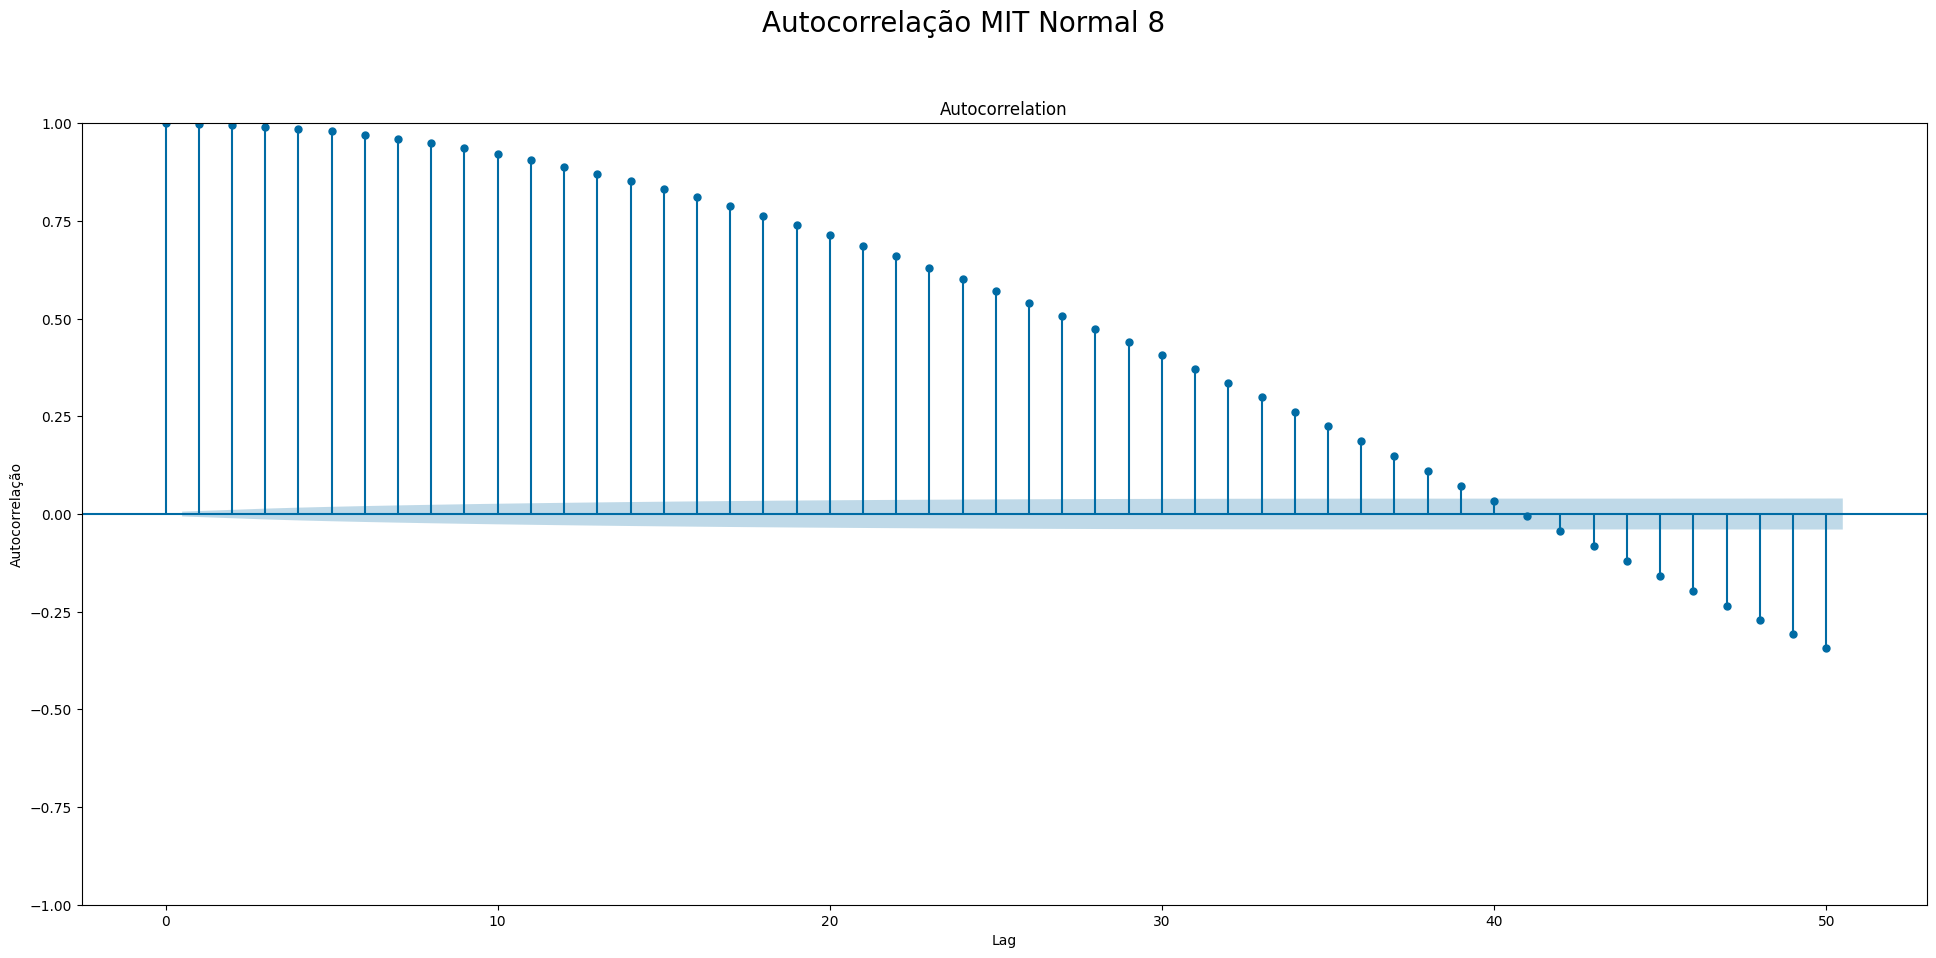

In [79]:
plot_autocorrelation2(normal,"MIT Normal")

### MIT com Defeito

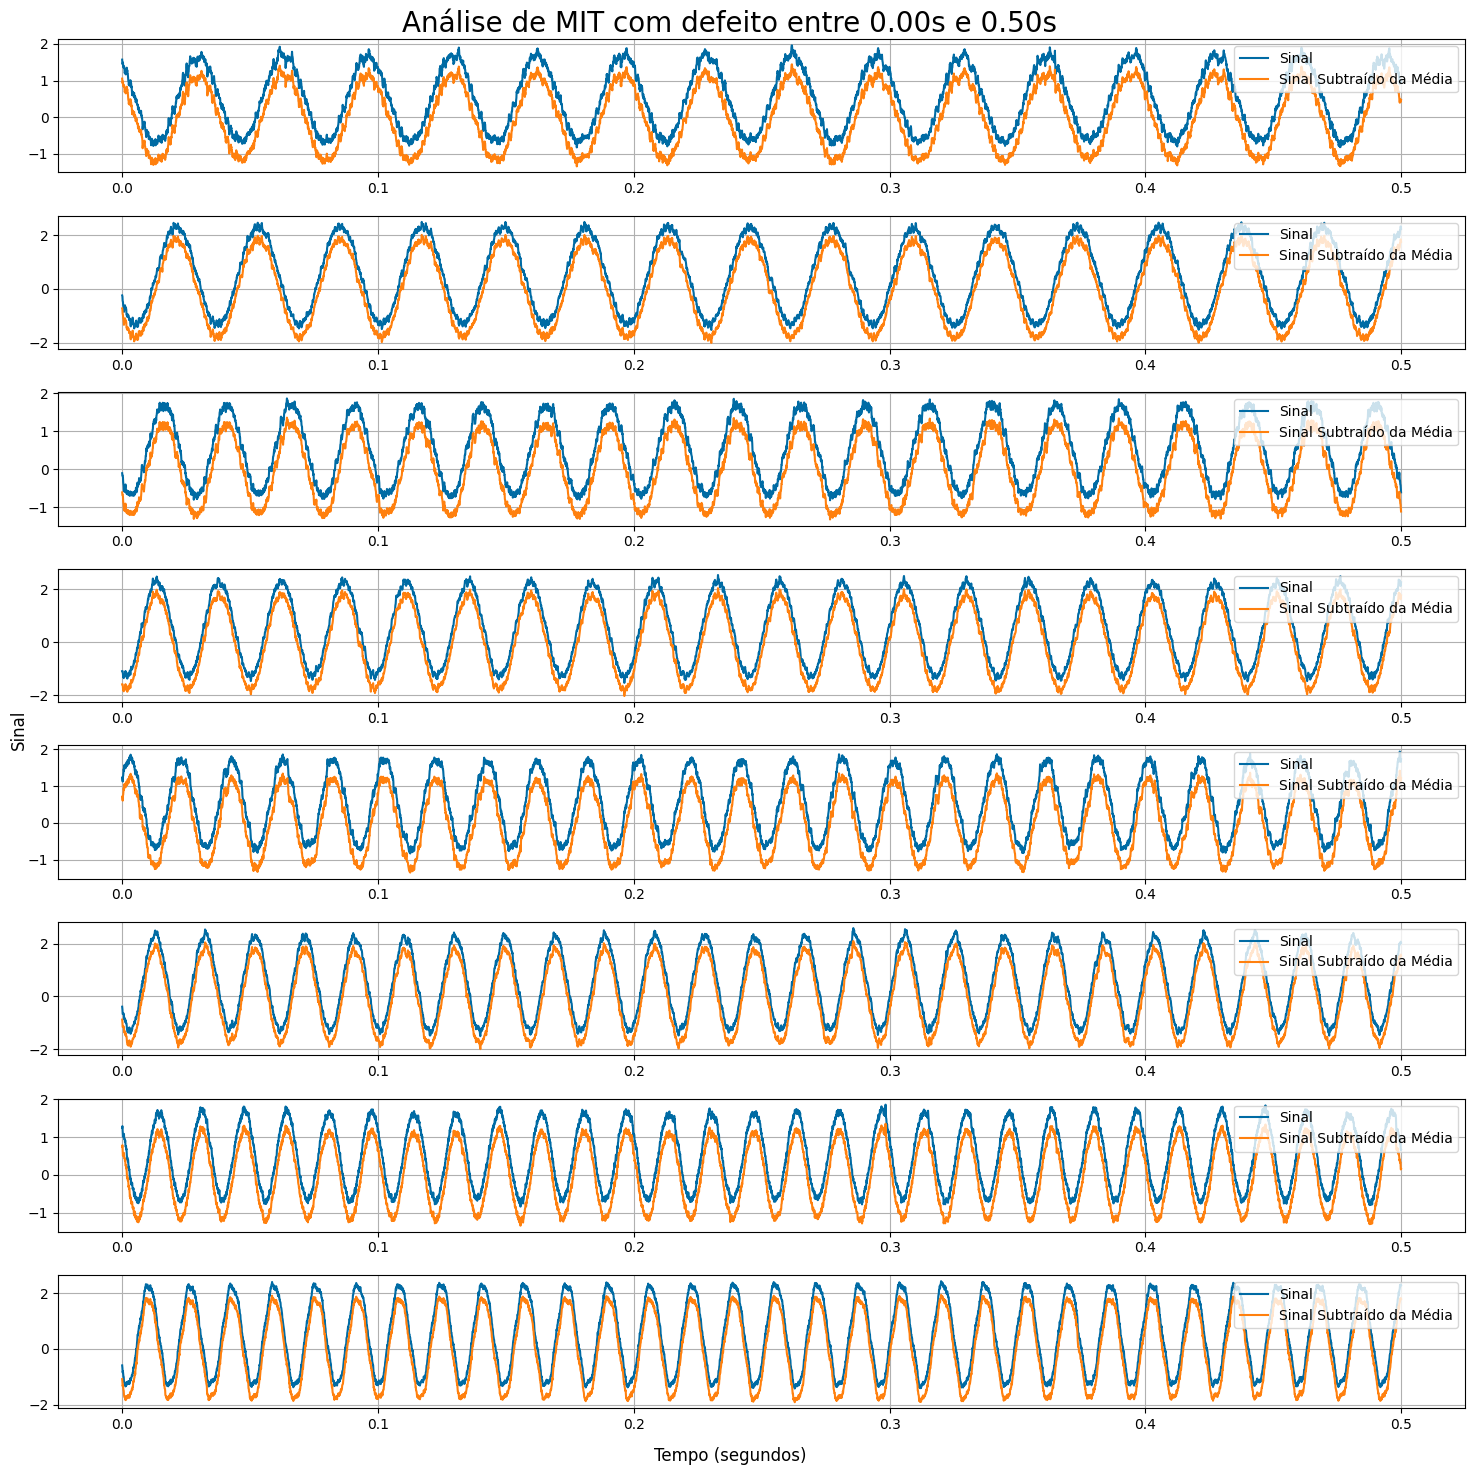

In [10]:
plot_time_domain(failing, 0, 0.5, "MIT com defeito")

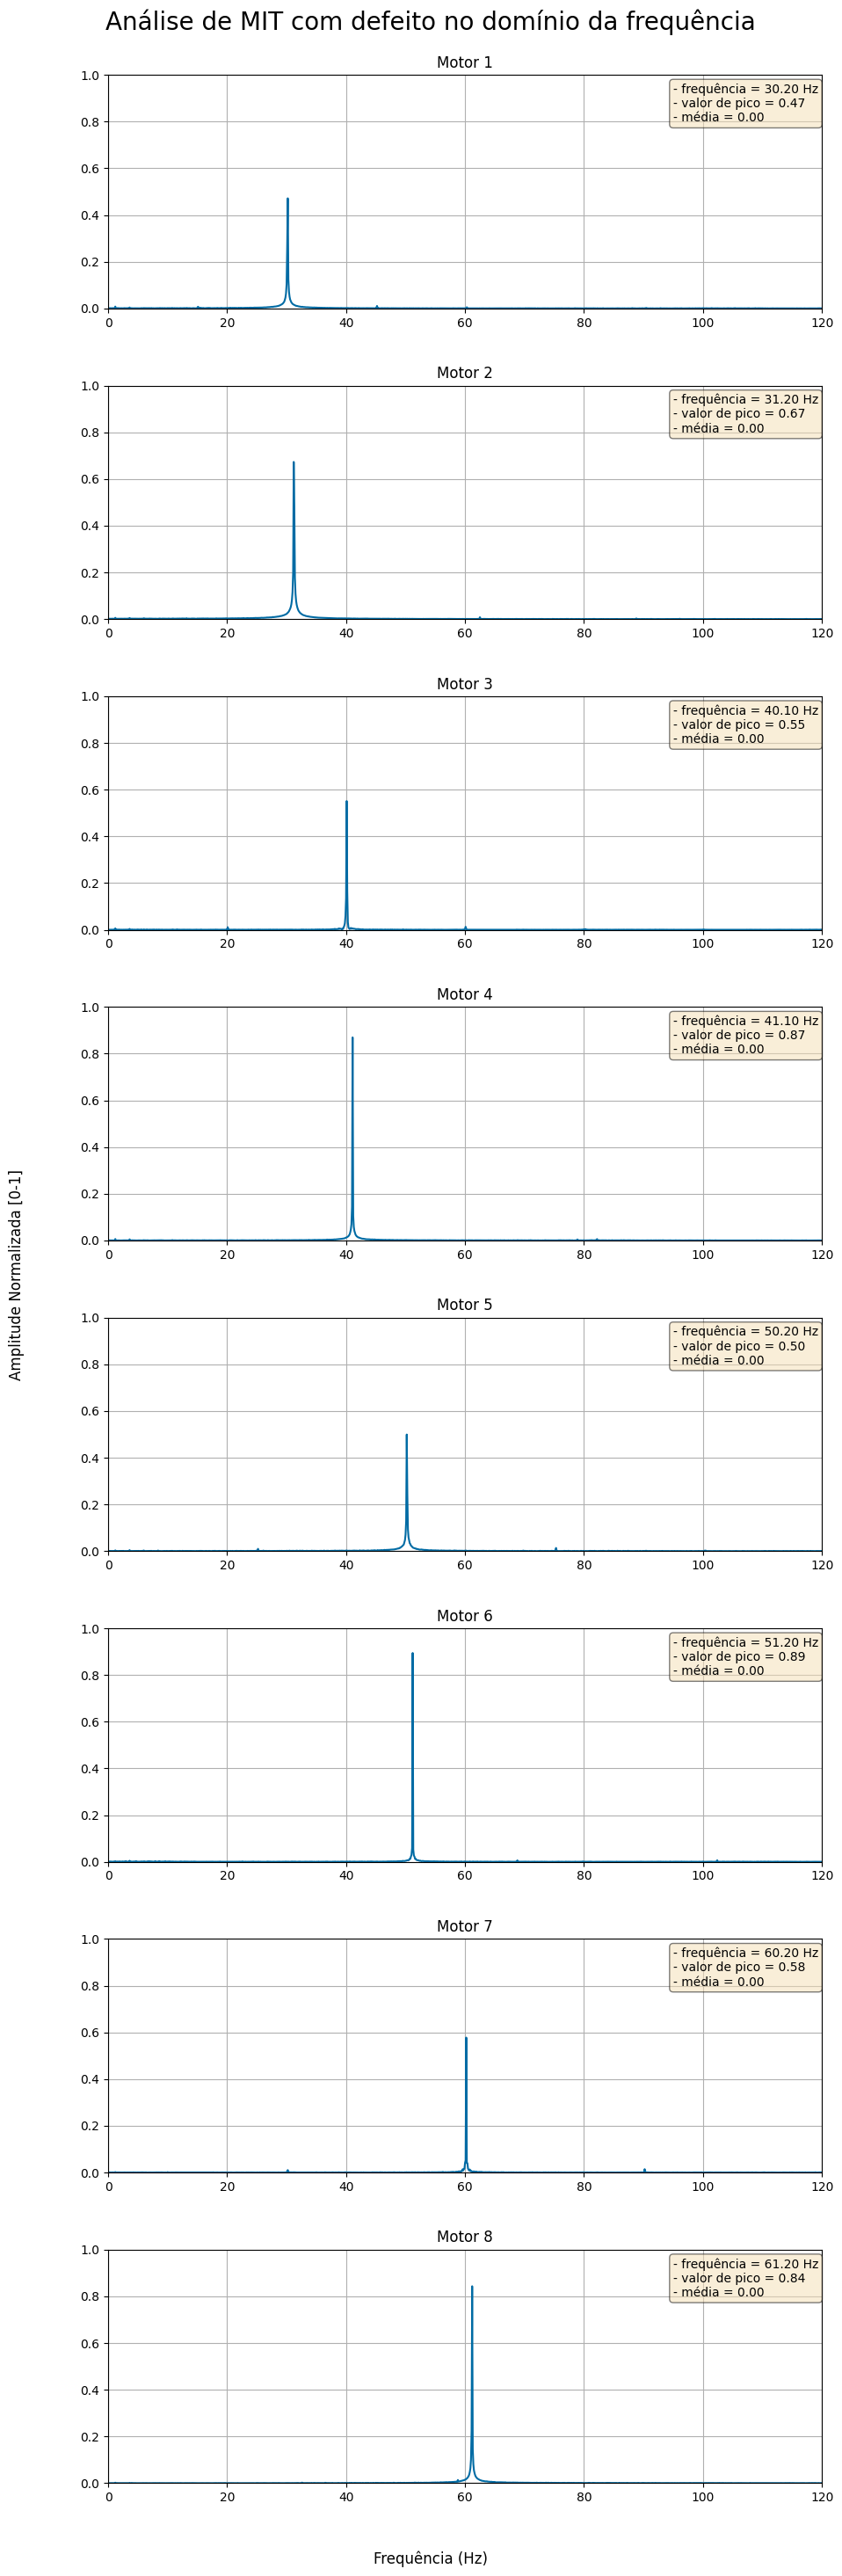

In [11]:
plot_frequency_domain(failing, "MIT com defeito")

#### FAC

<Figure size 2000x1000 with 0 Axes>

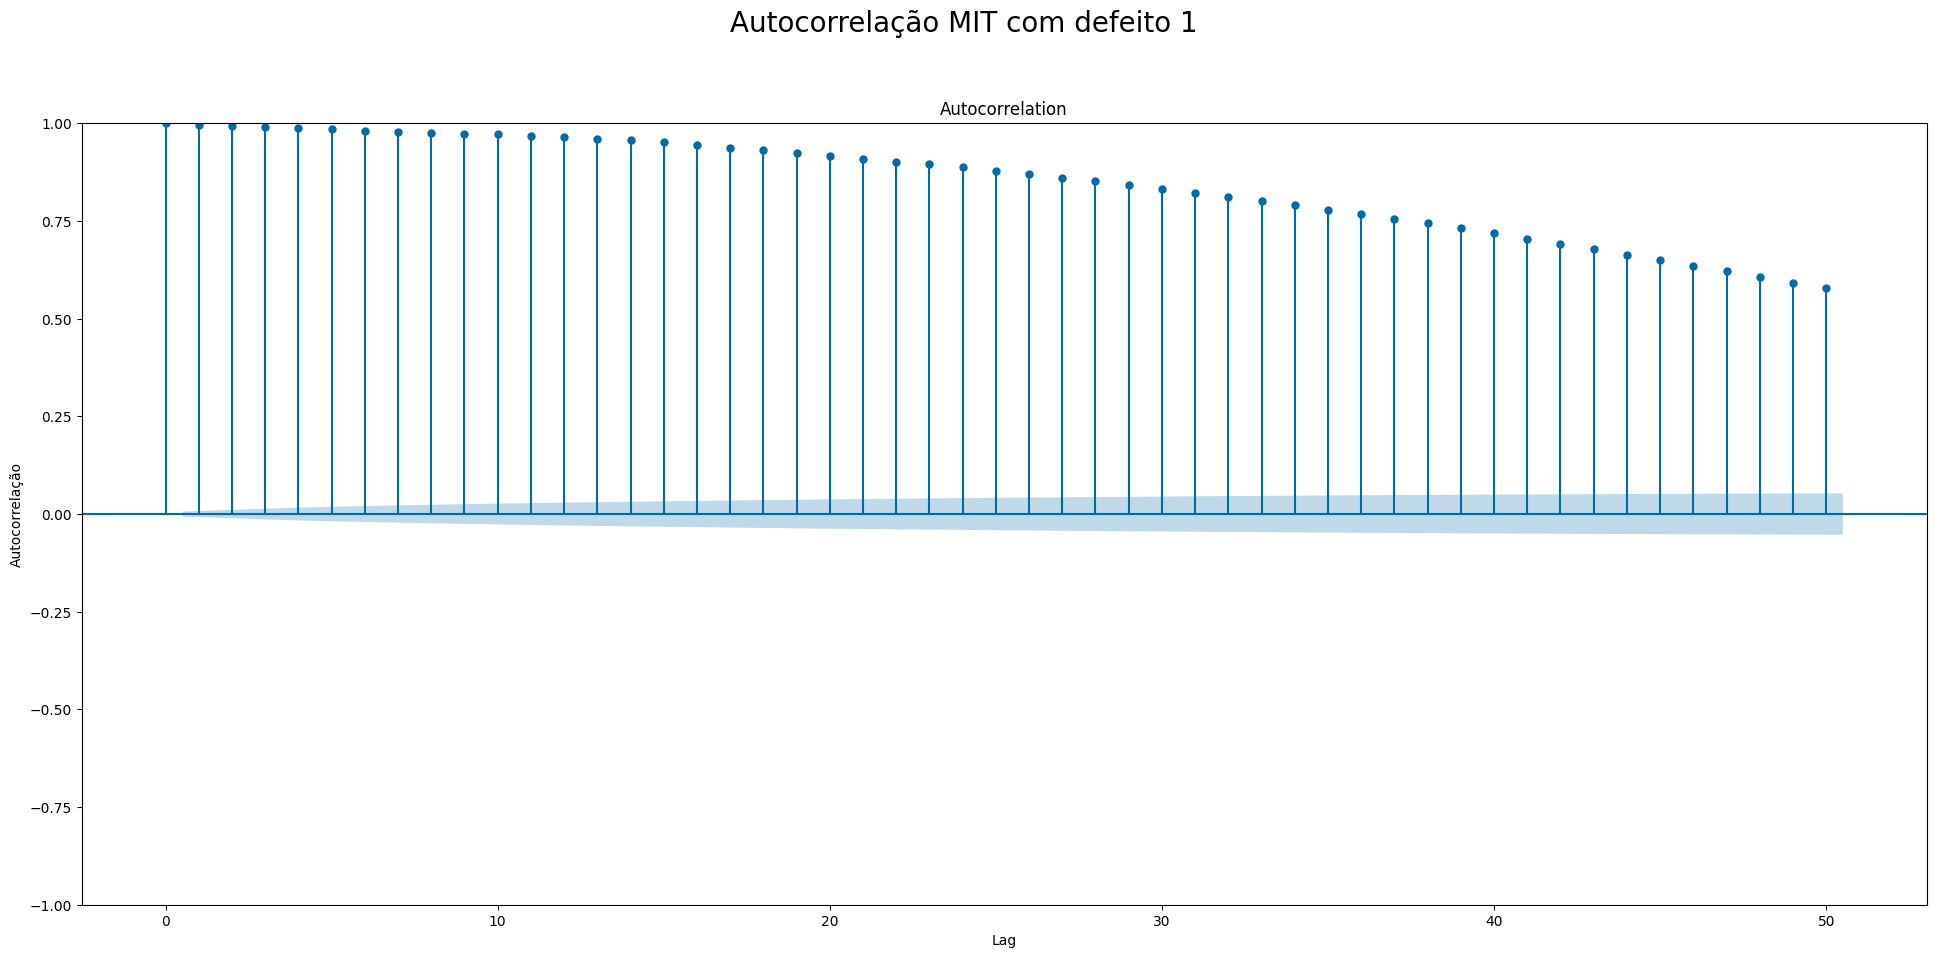

<Figure size 2000x1000 with 0 Axes>

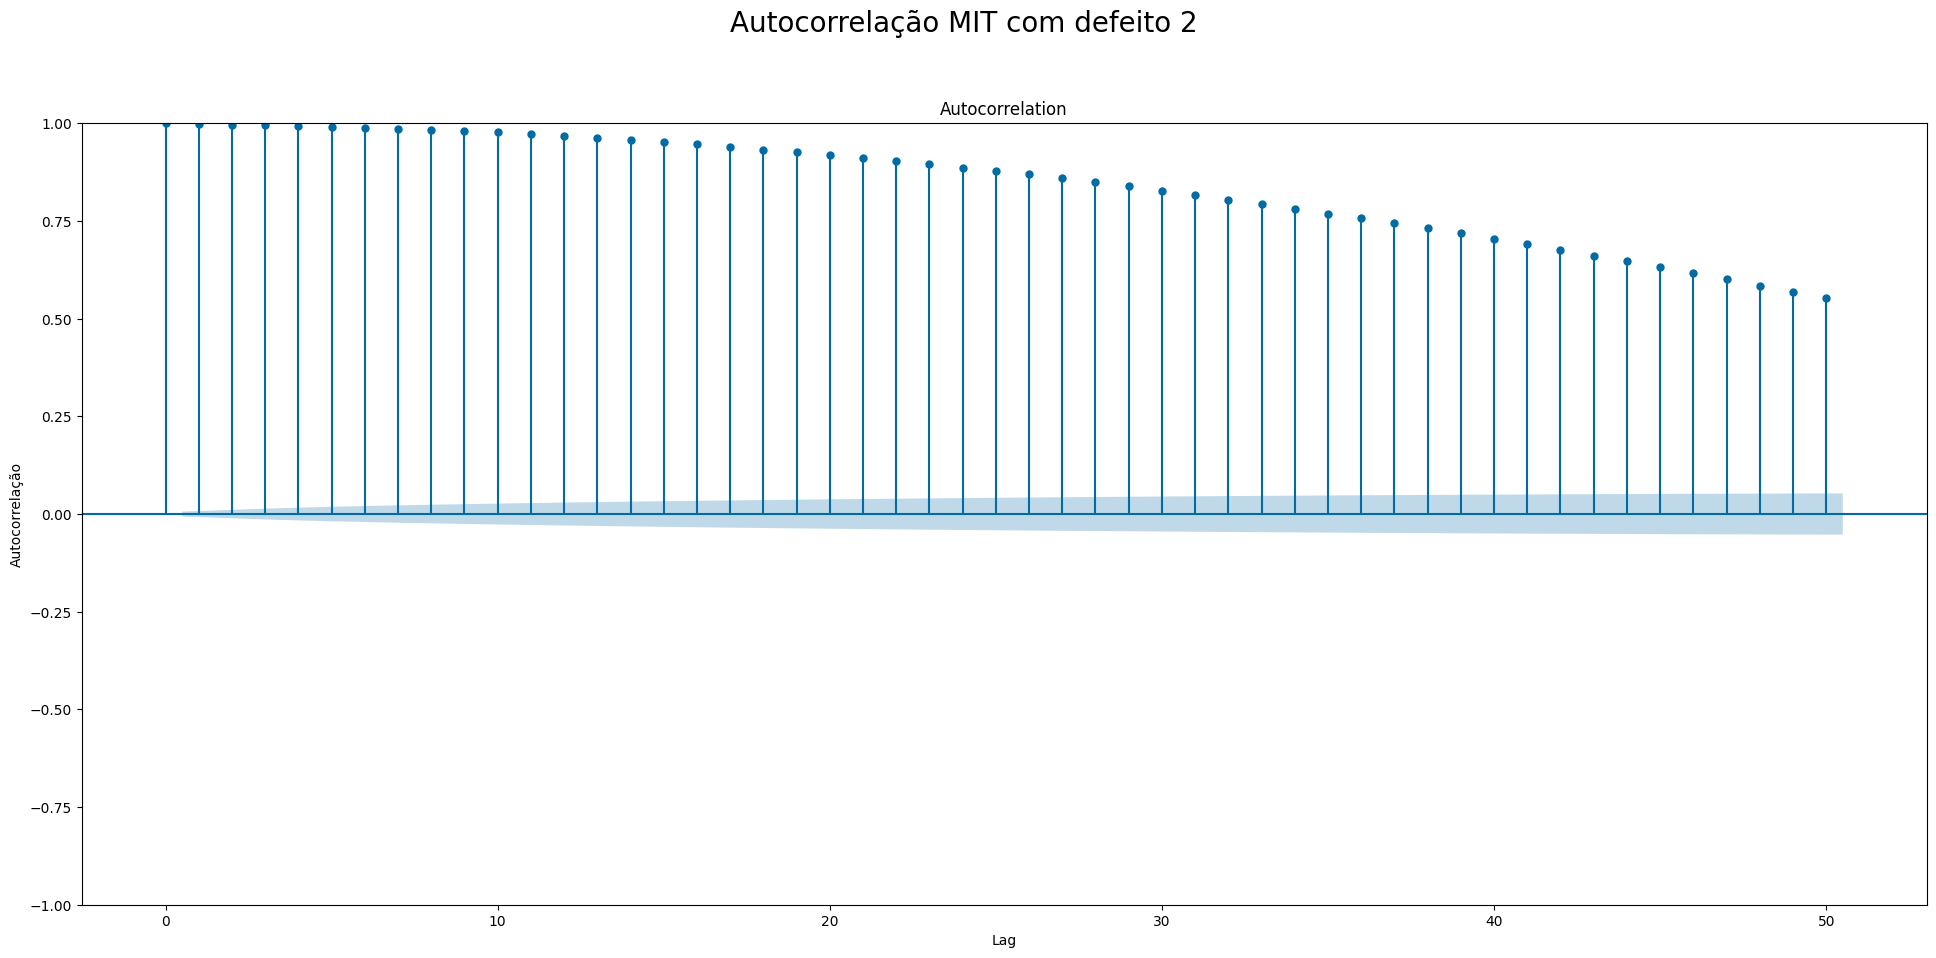

<Figure size 2000x1000 with 0 Axes>

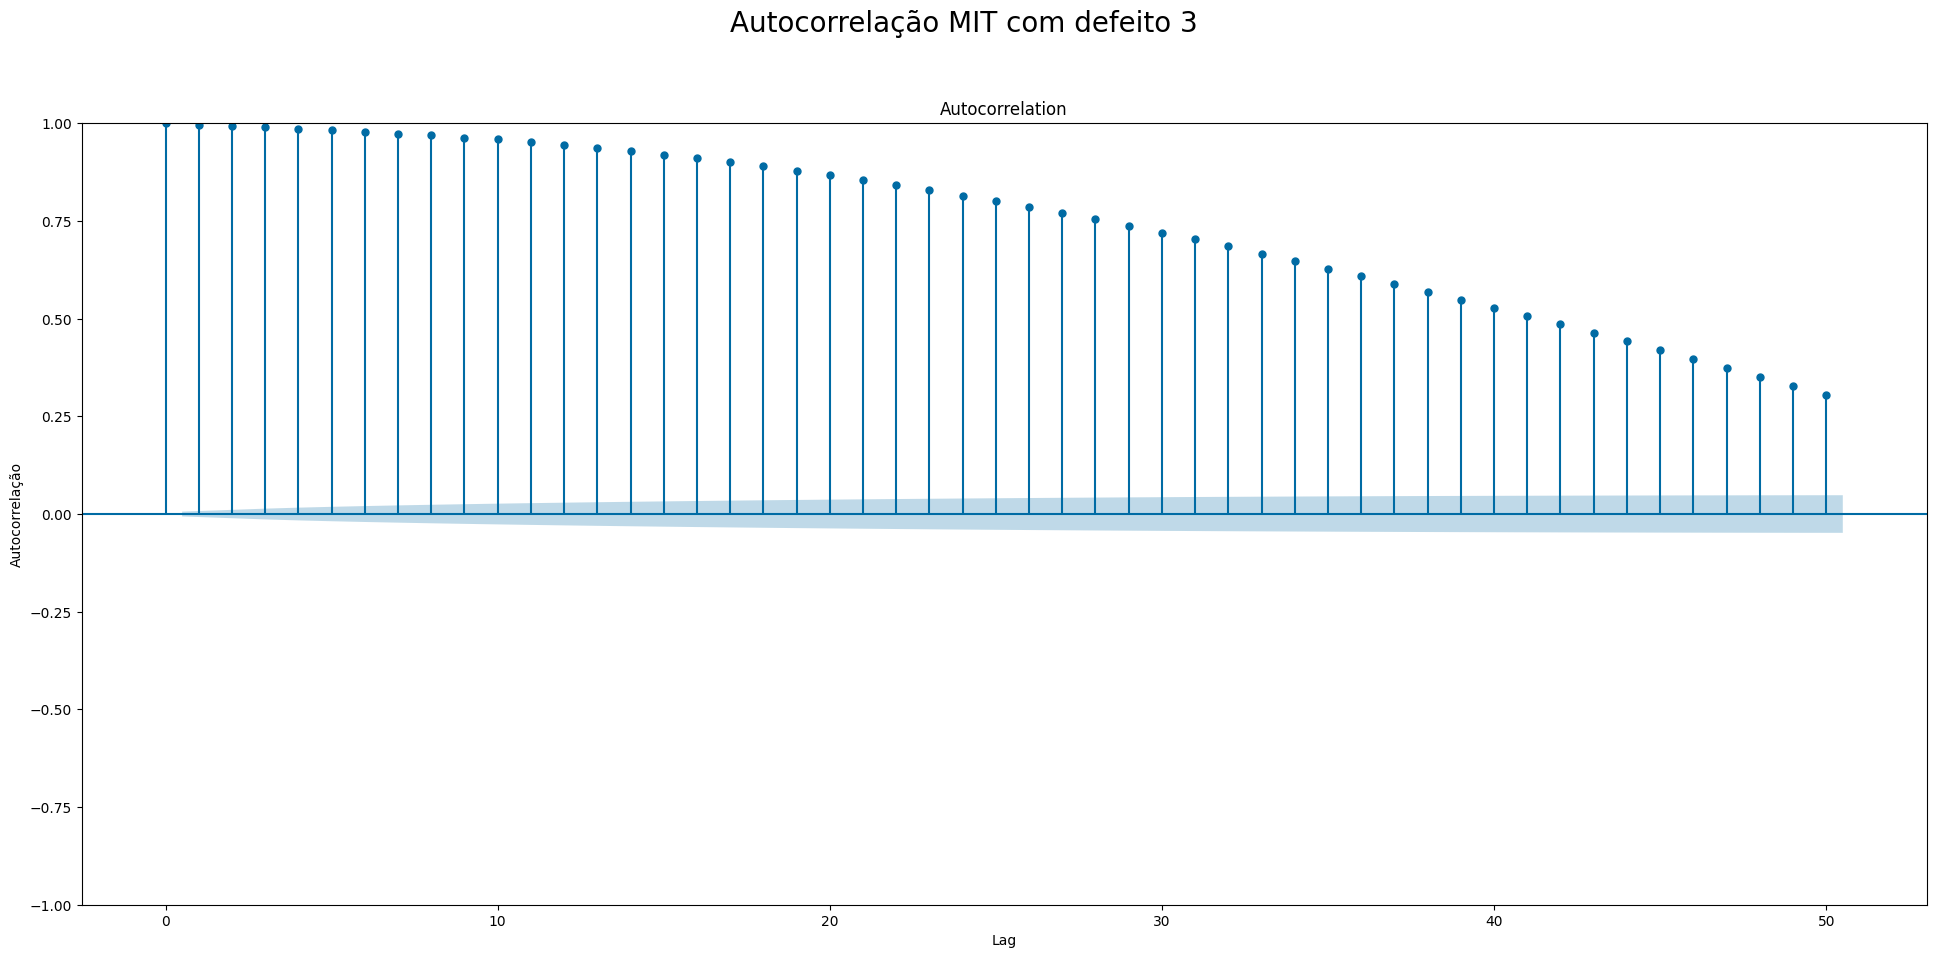

<Figure size 2000x1000 with 0 Axes>

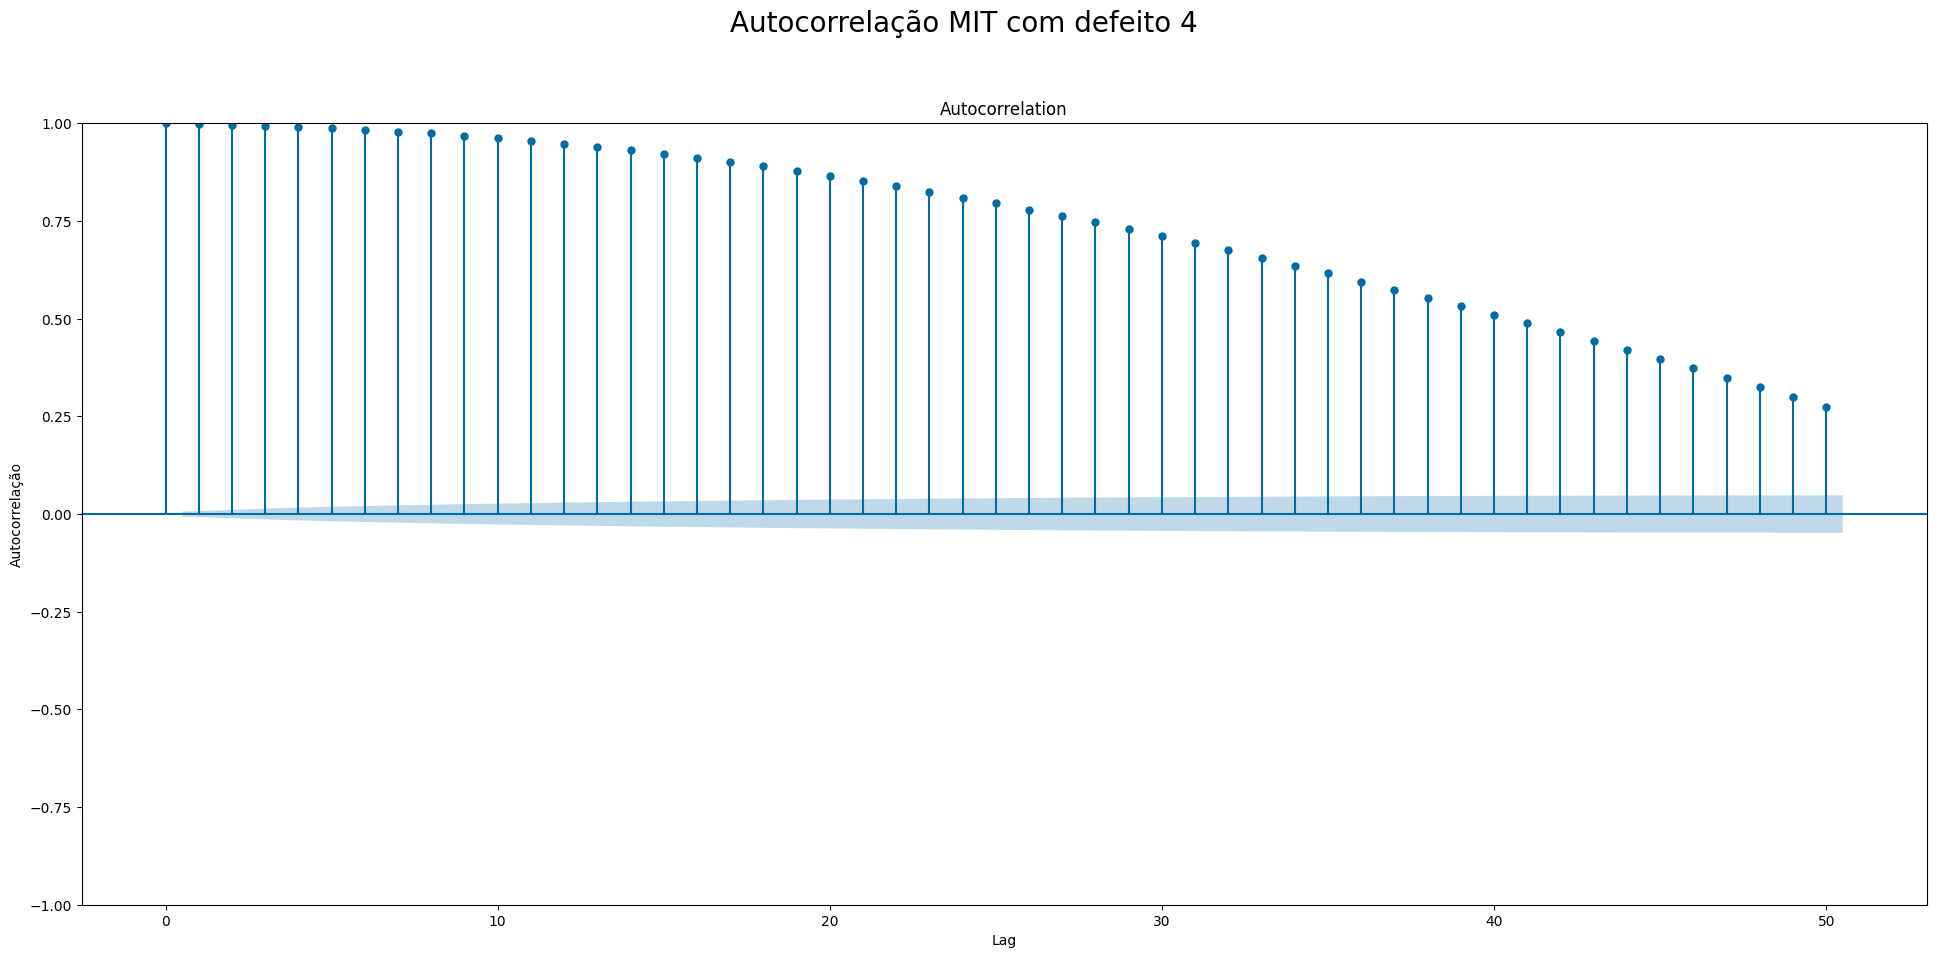

<Figure size 2000x1000 with 0 Axes>

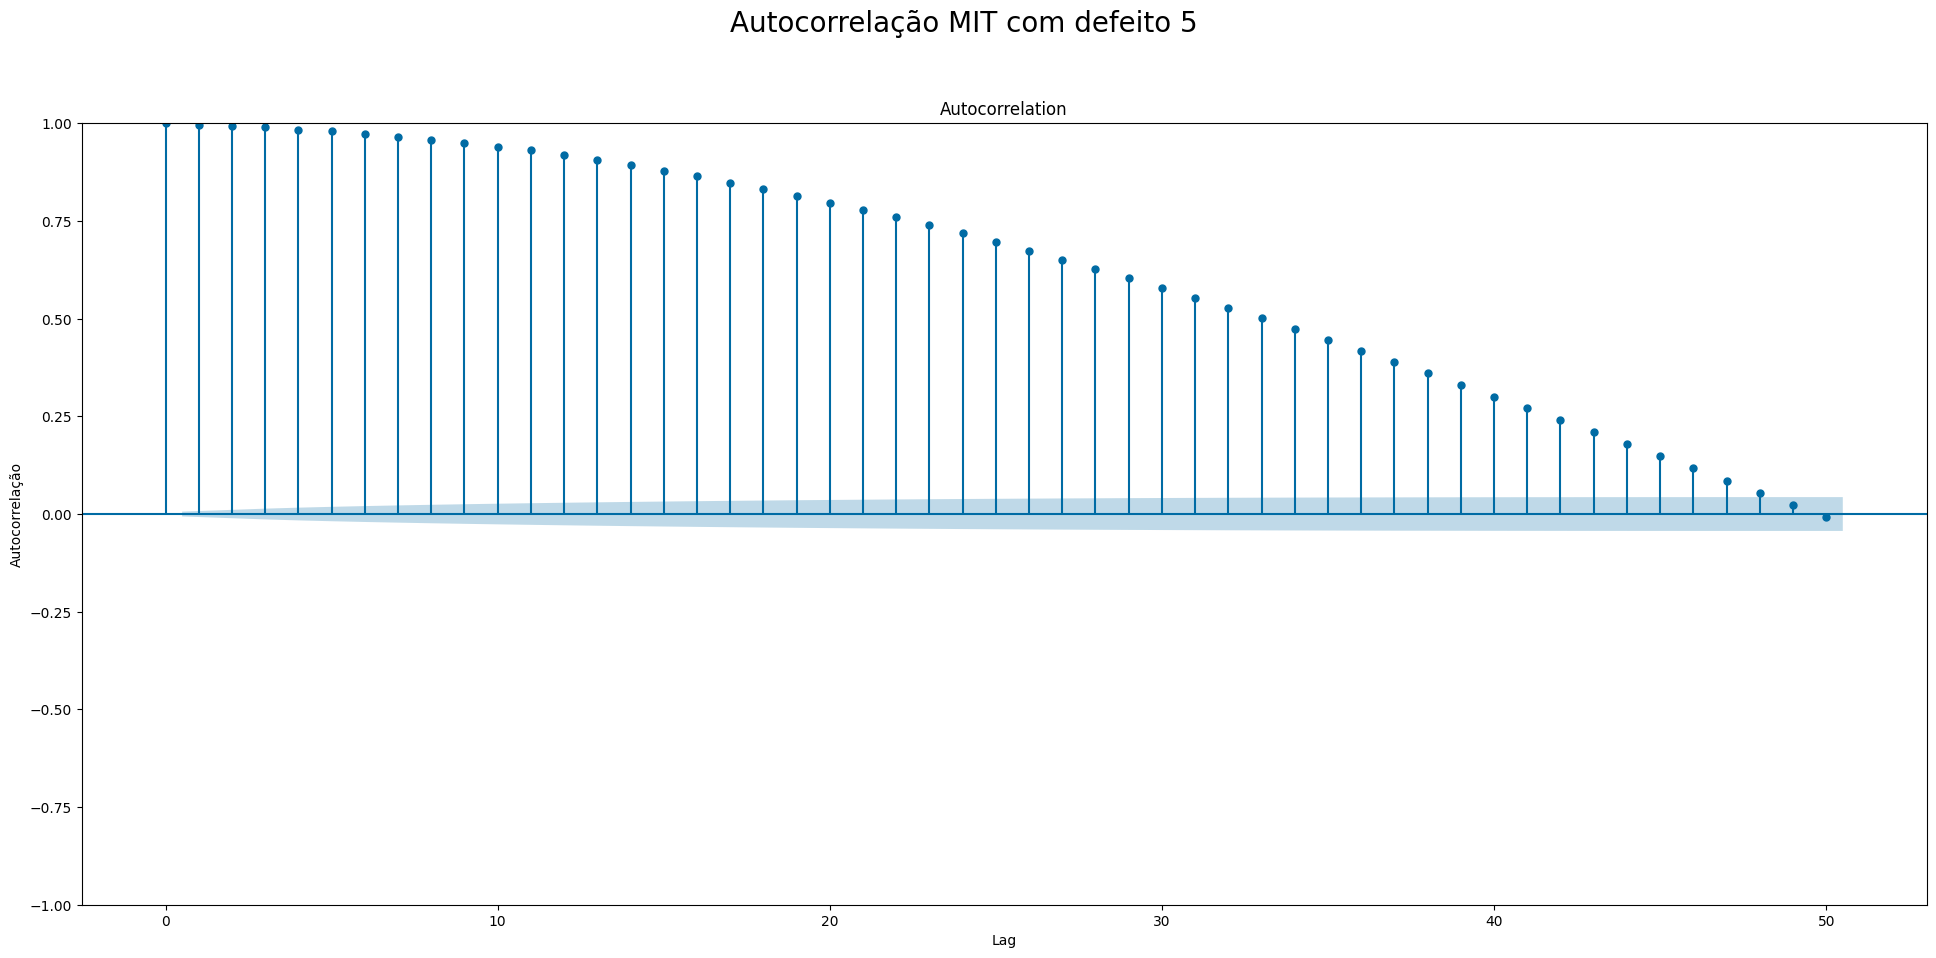

<Figure size 2000x1000 with 0 Axes>

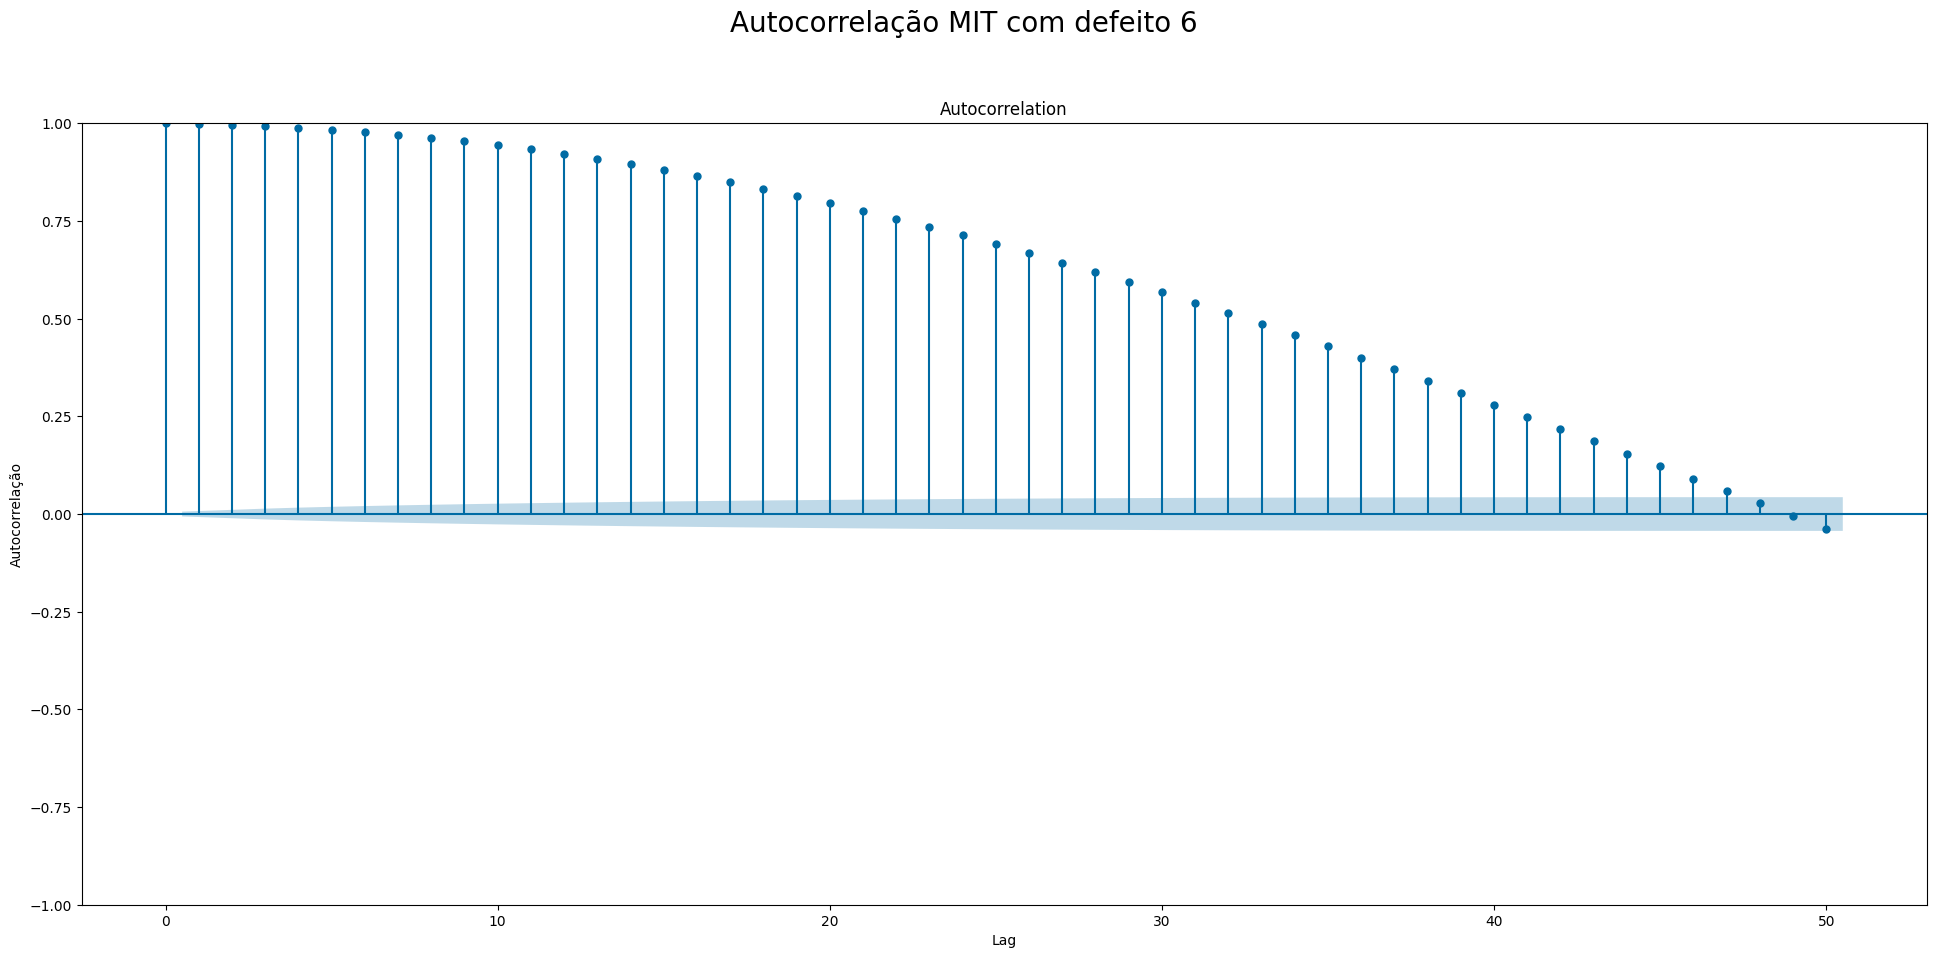

<Figure size 2000x1000 with 0 Axes>

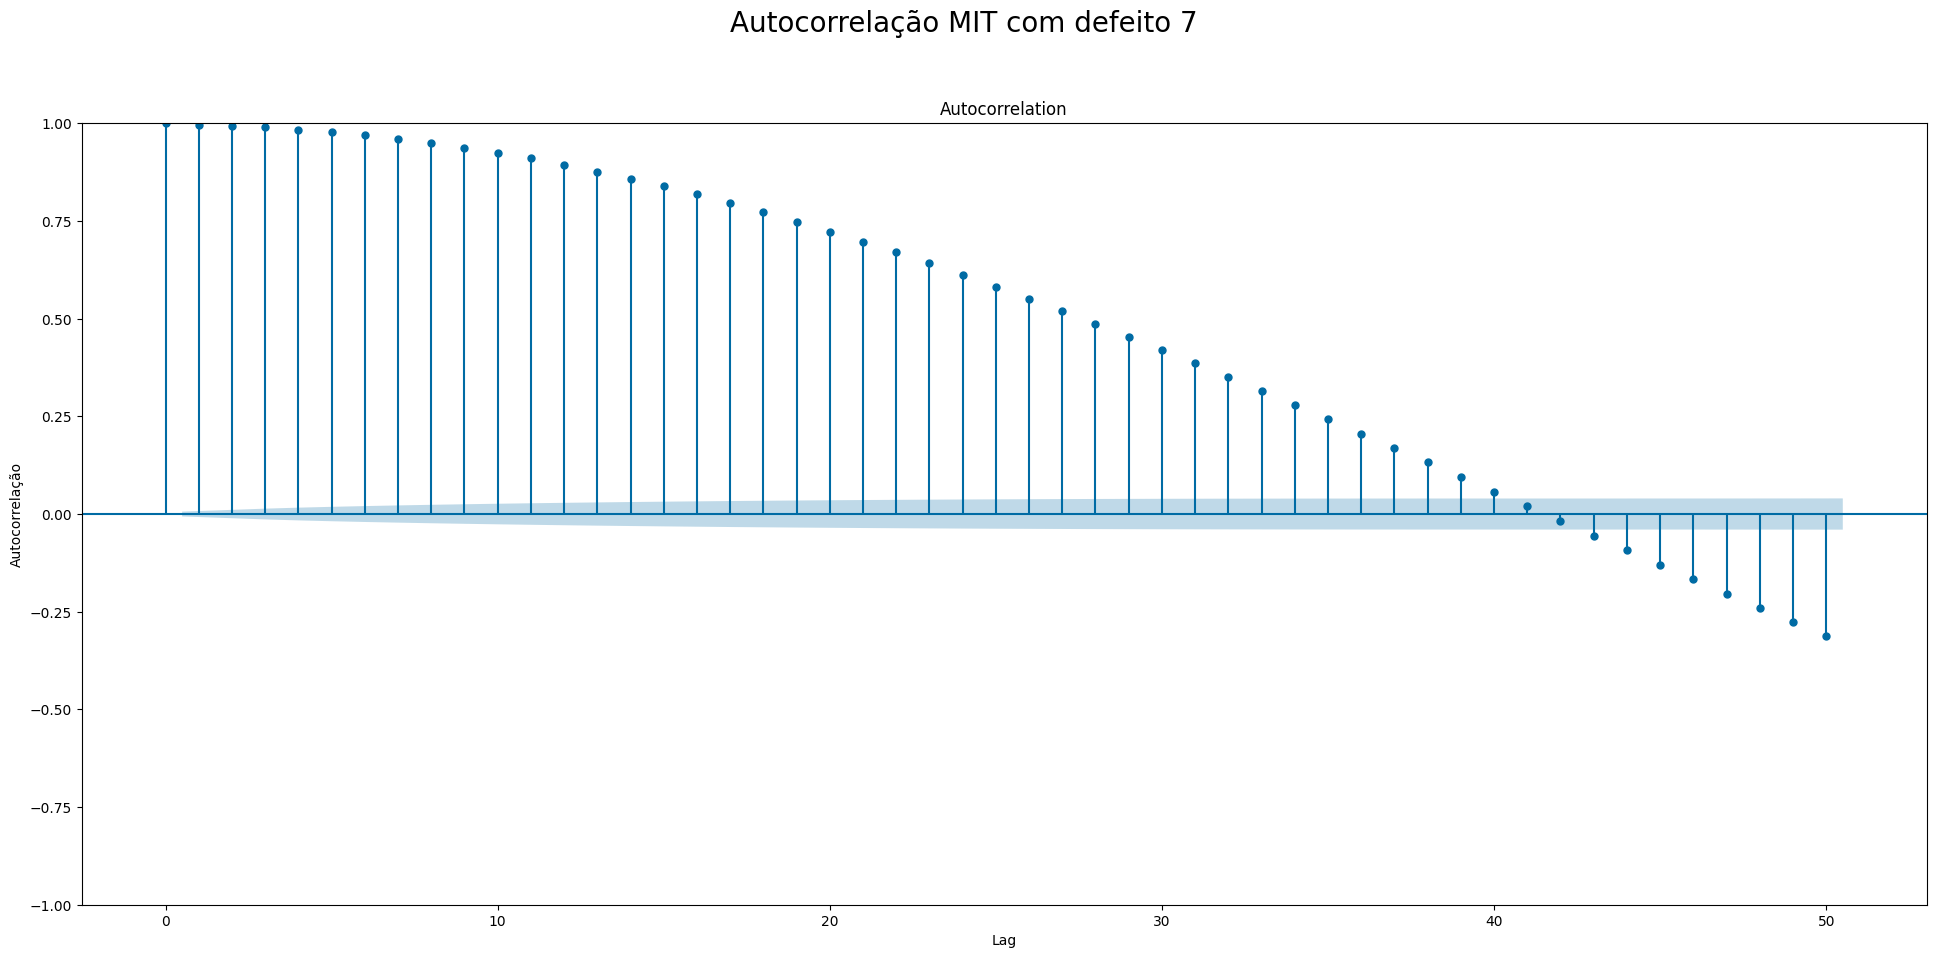

<Figure size 2000x1000 with 0 Axes>

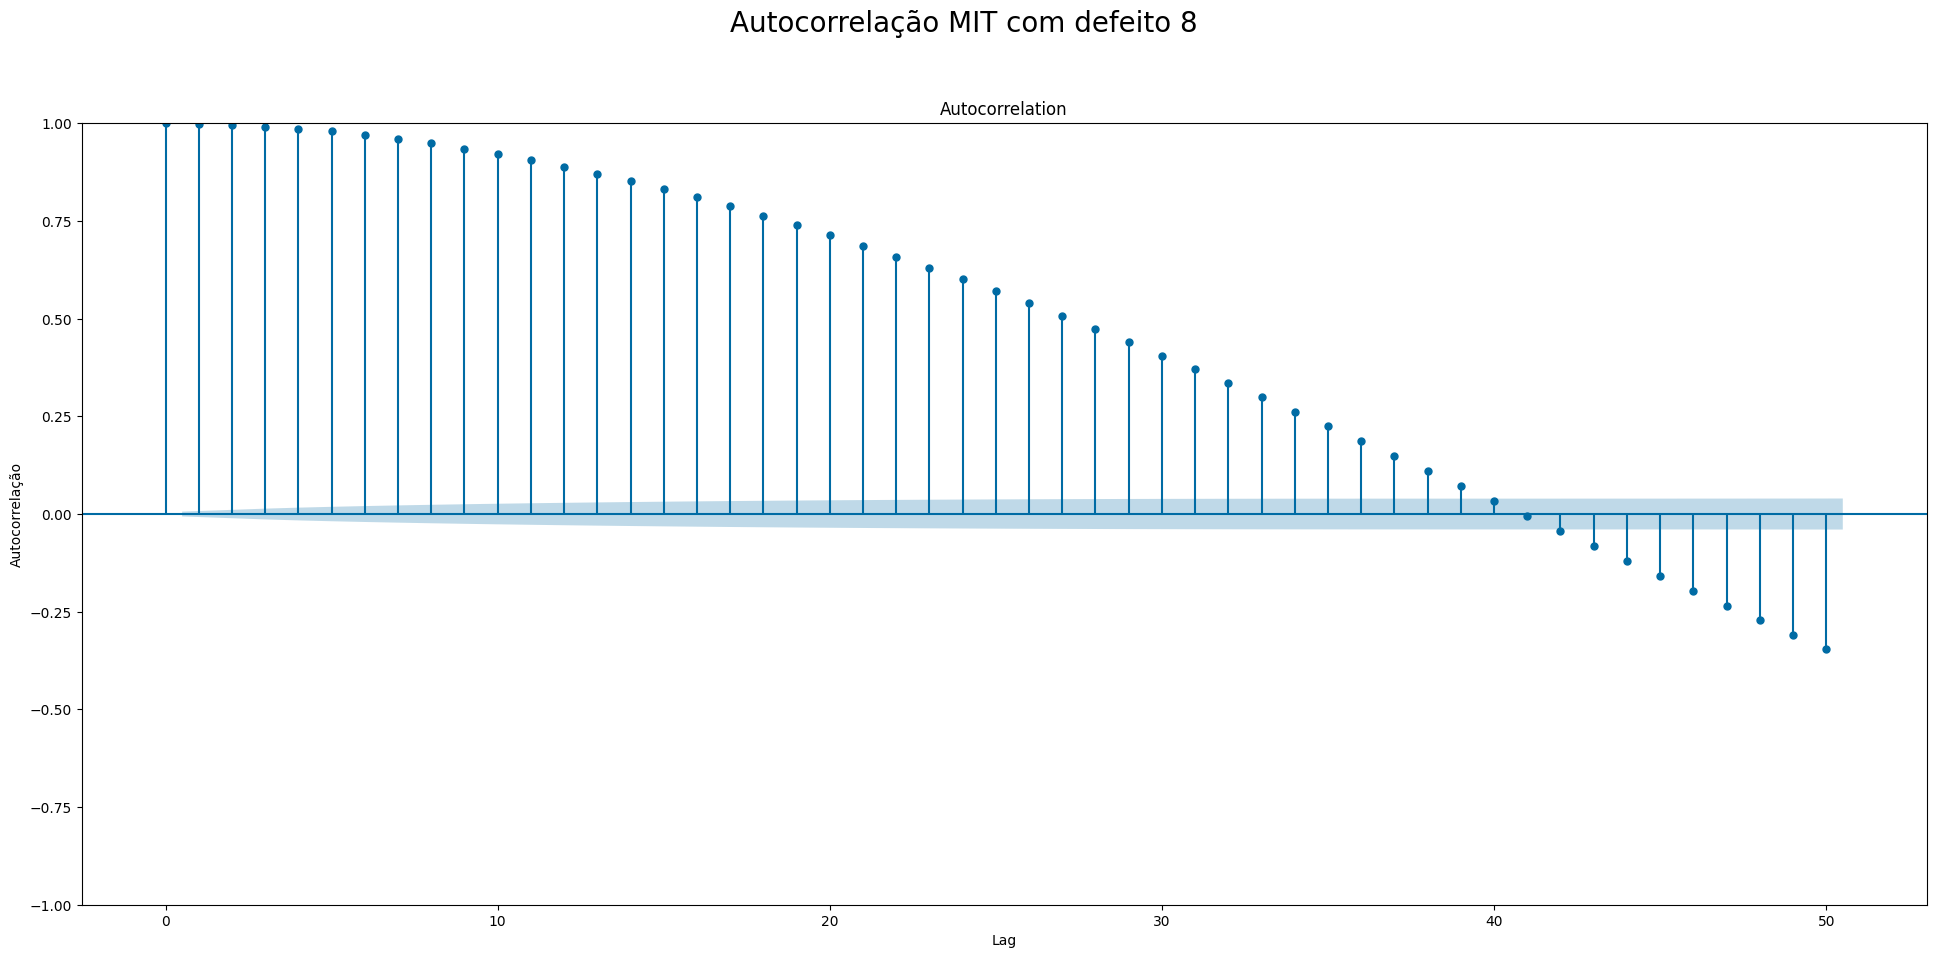

In [80]:
plot_autocorrelation2(failing,"MIT com defeito")

### MIT desconhecido

### Domínio do tempo

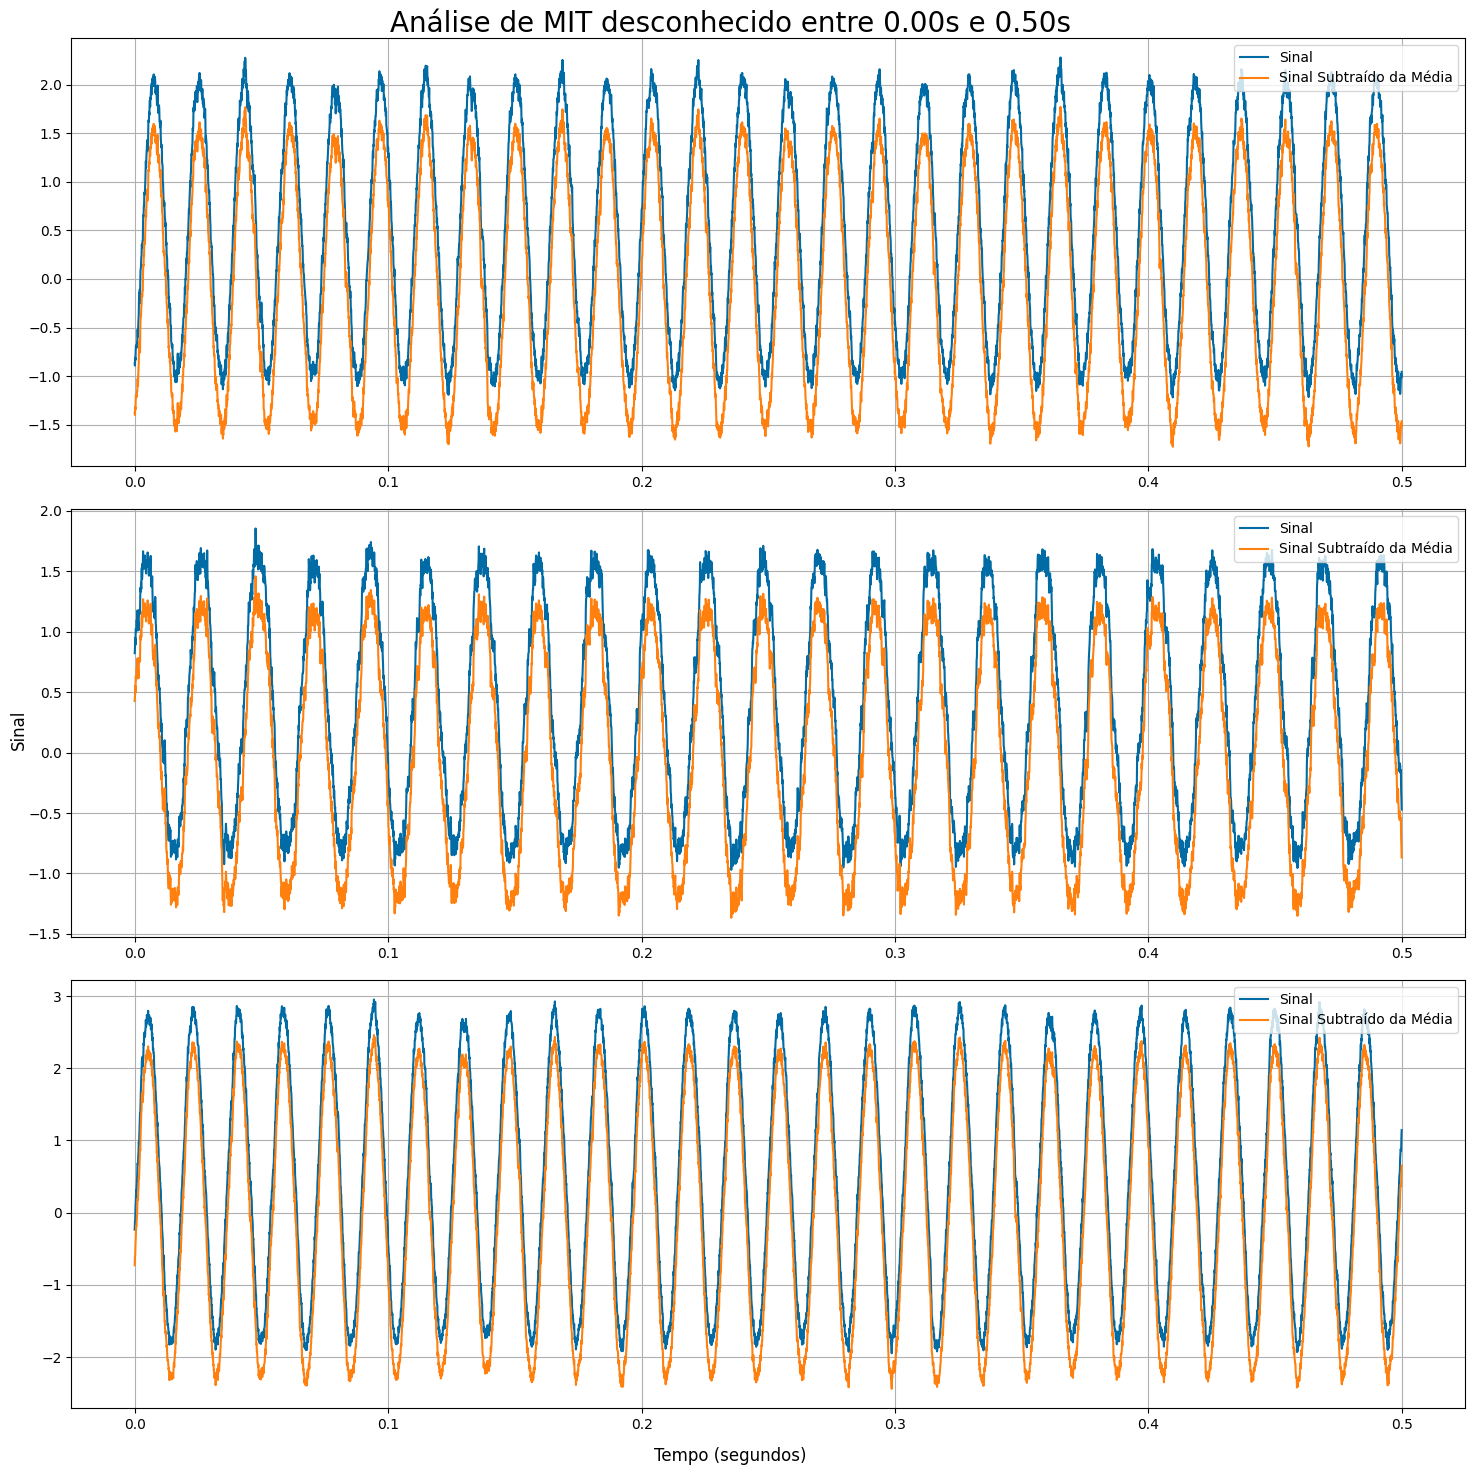

In [12]:
plot_time_domain(unknown, 0, 0.5, "MIT desconhecido")

###Domínio da Frequência

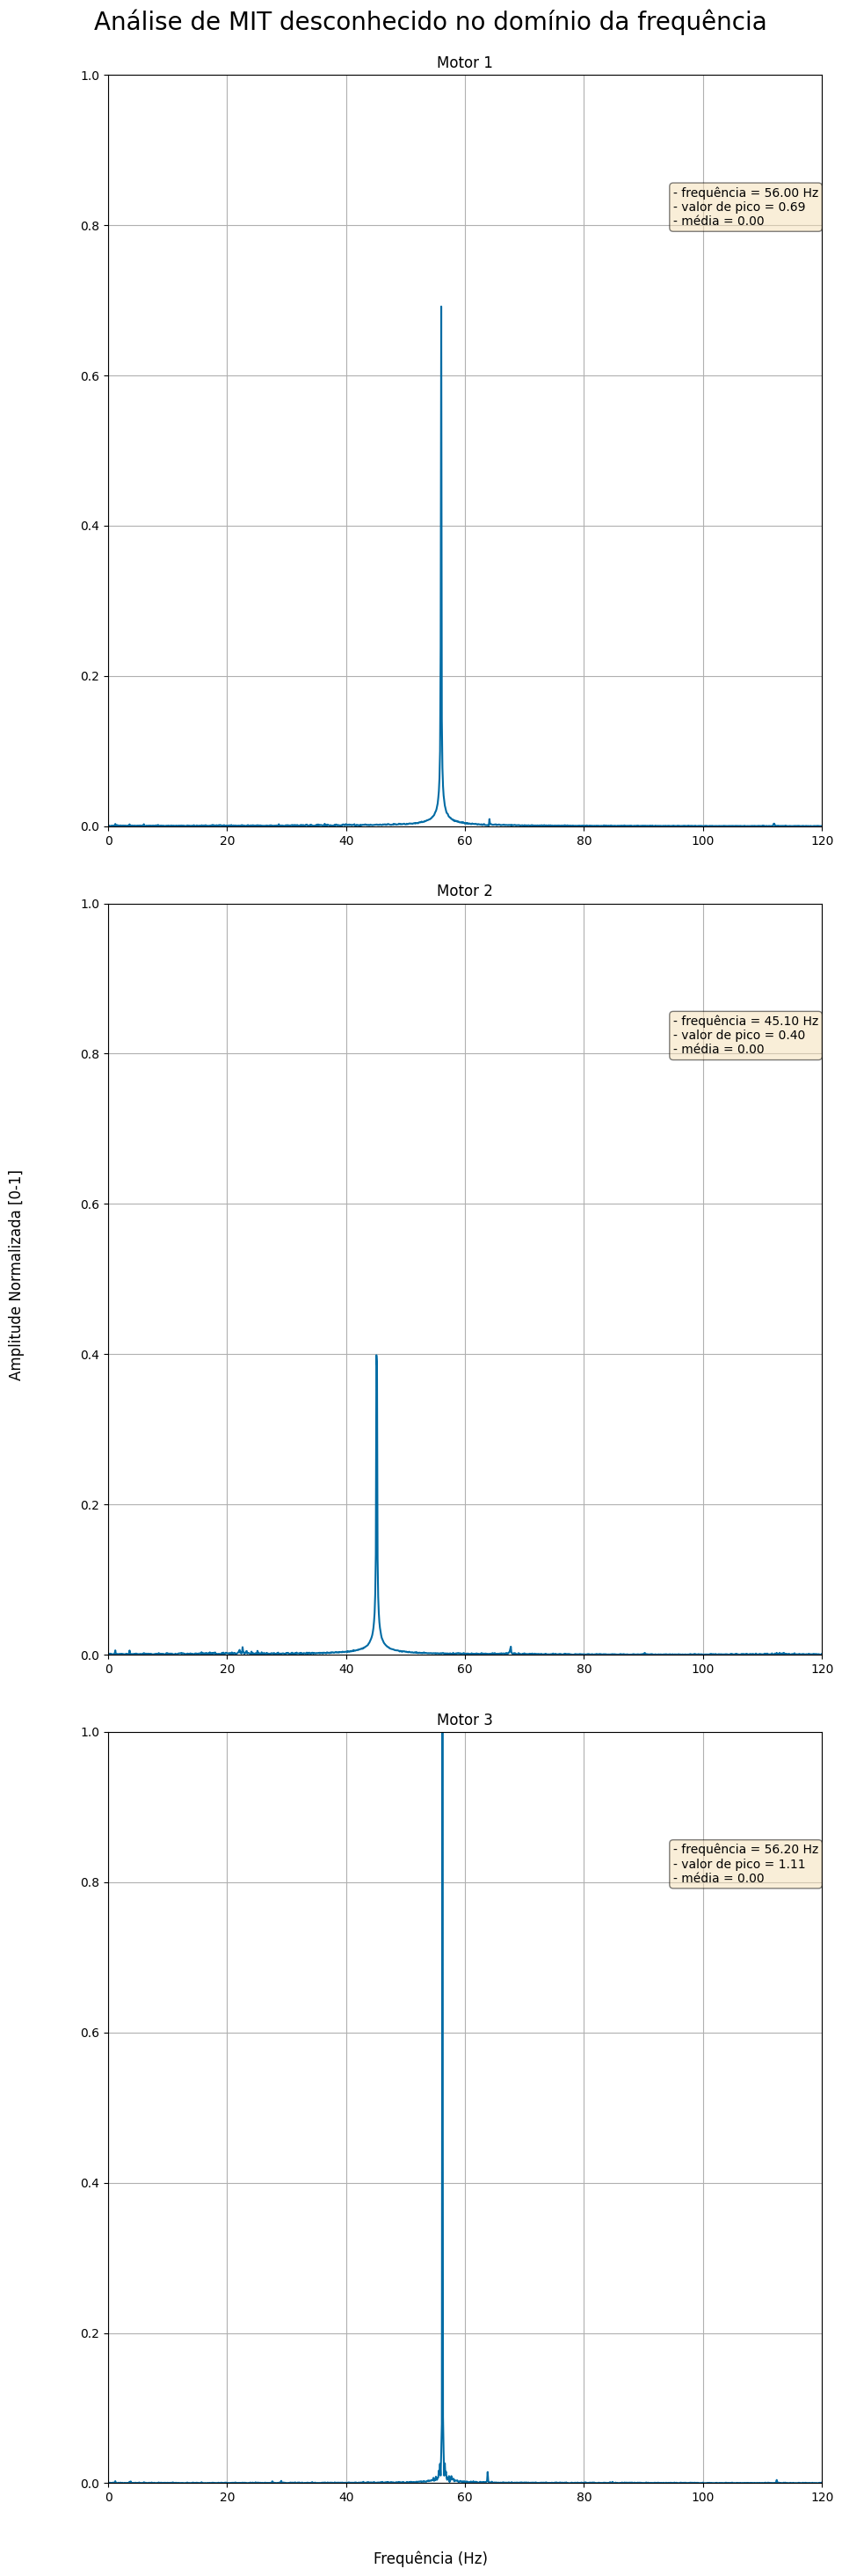

In [13]:
plot_frequency_domain(unknown, "MIT desconhecido")

#### Autocorrelação

<Figure size 2000x1000 with 0 Axes>

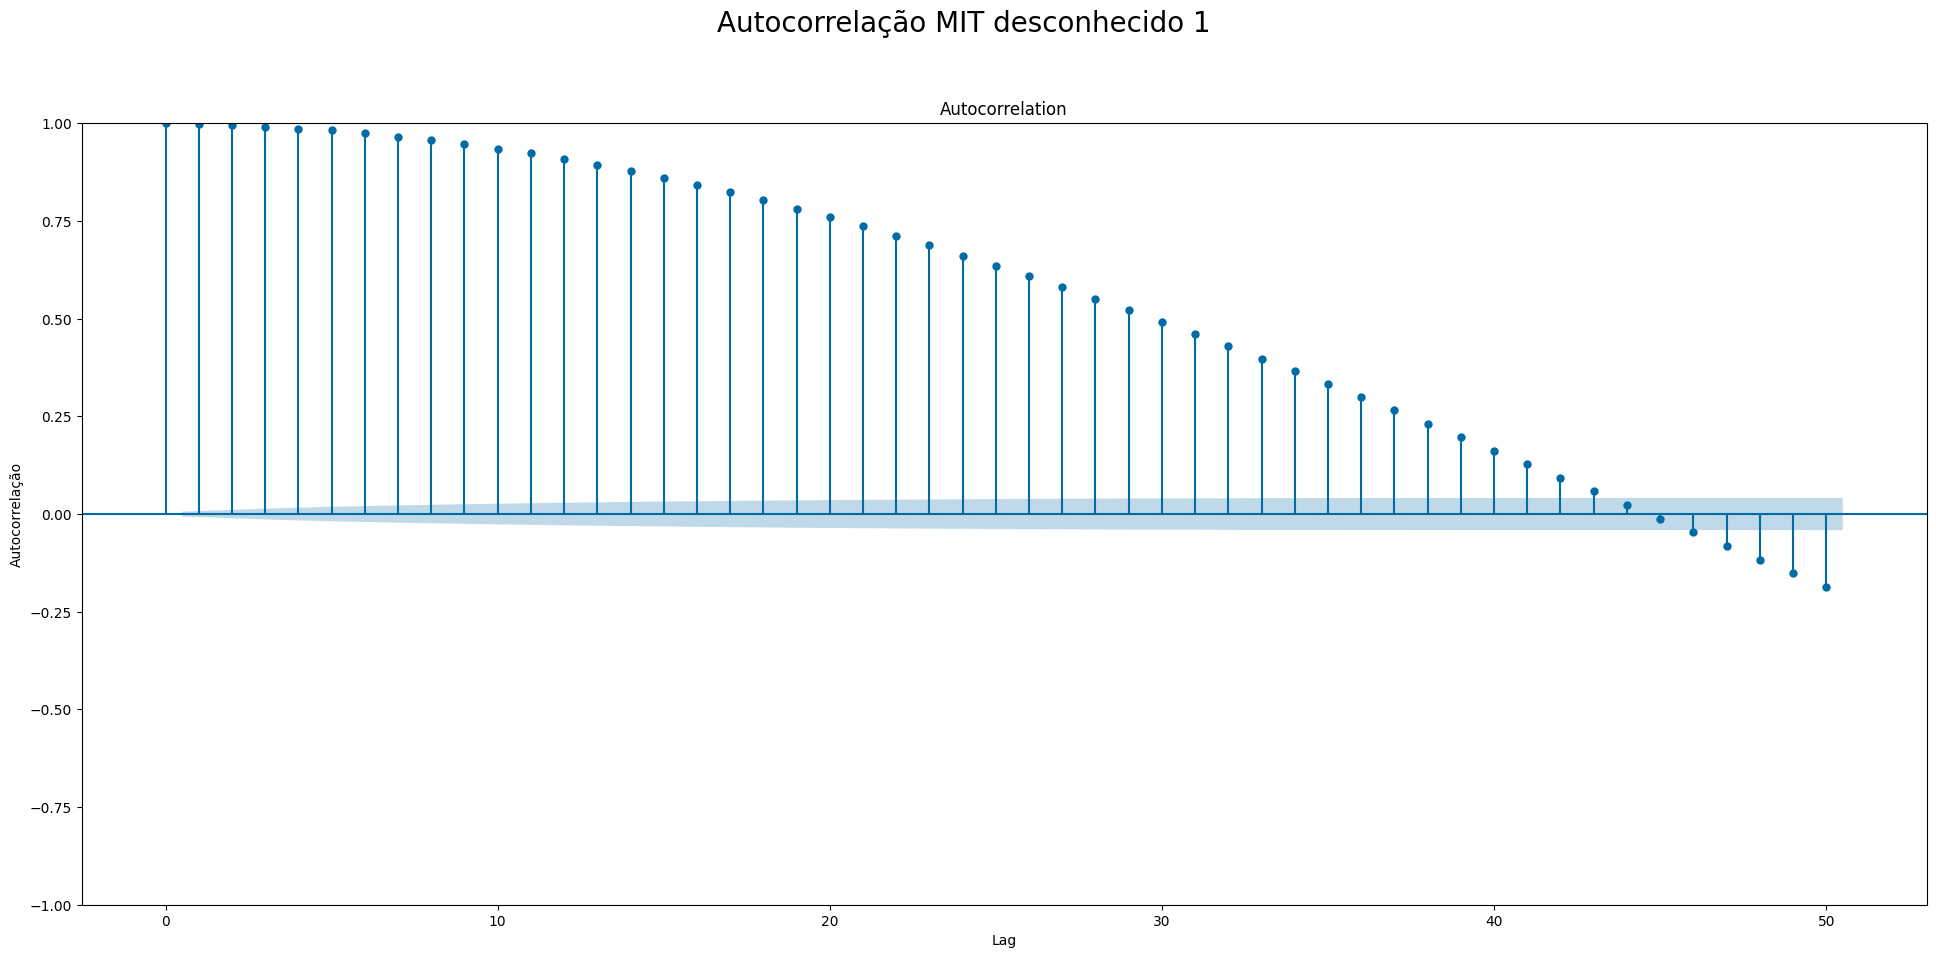

<Figure size 2000x1000 with 0 Axes>

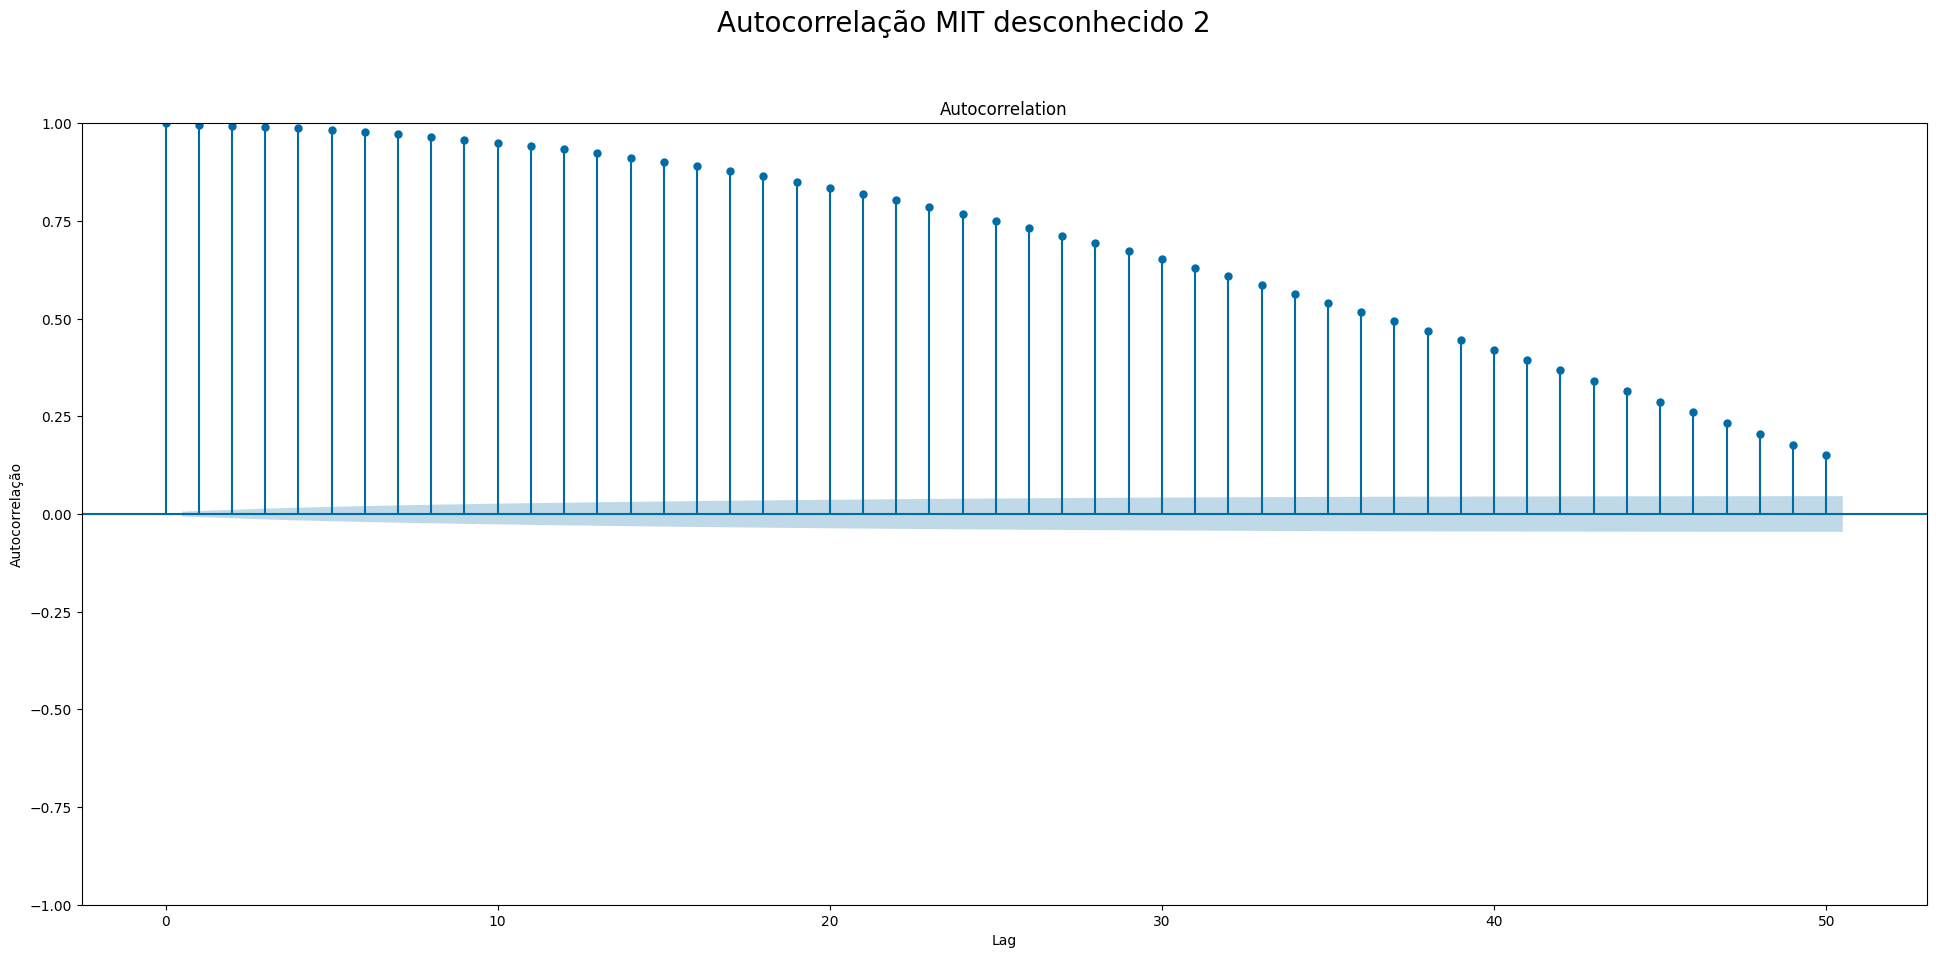

<Figure size 2000x1000 with 0 Axes>

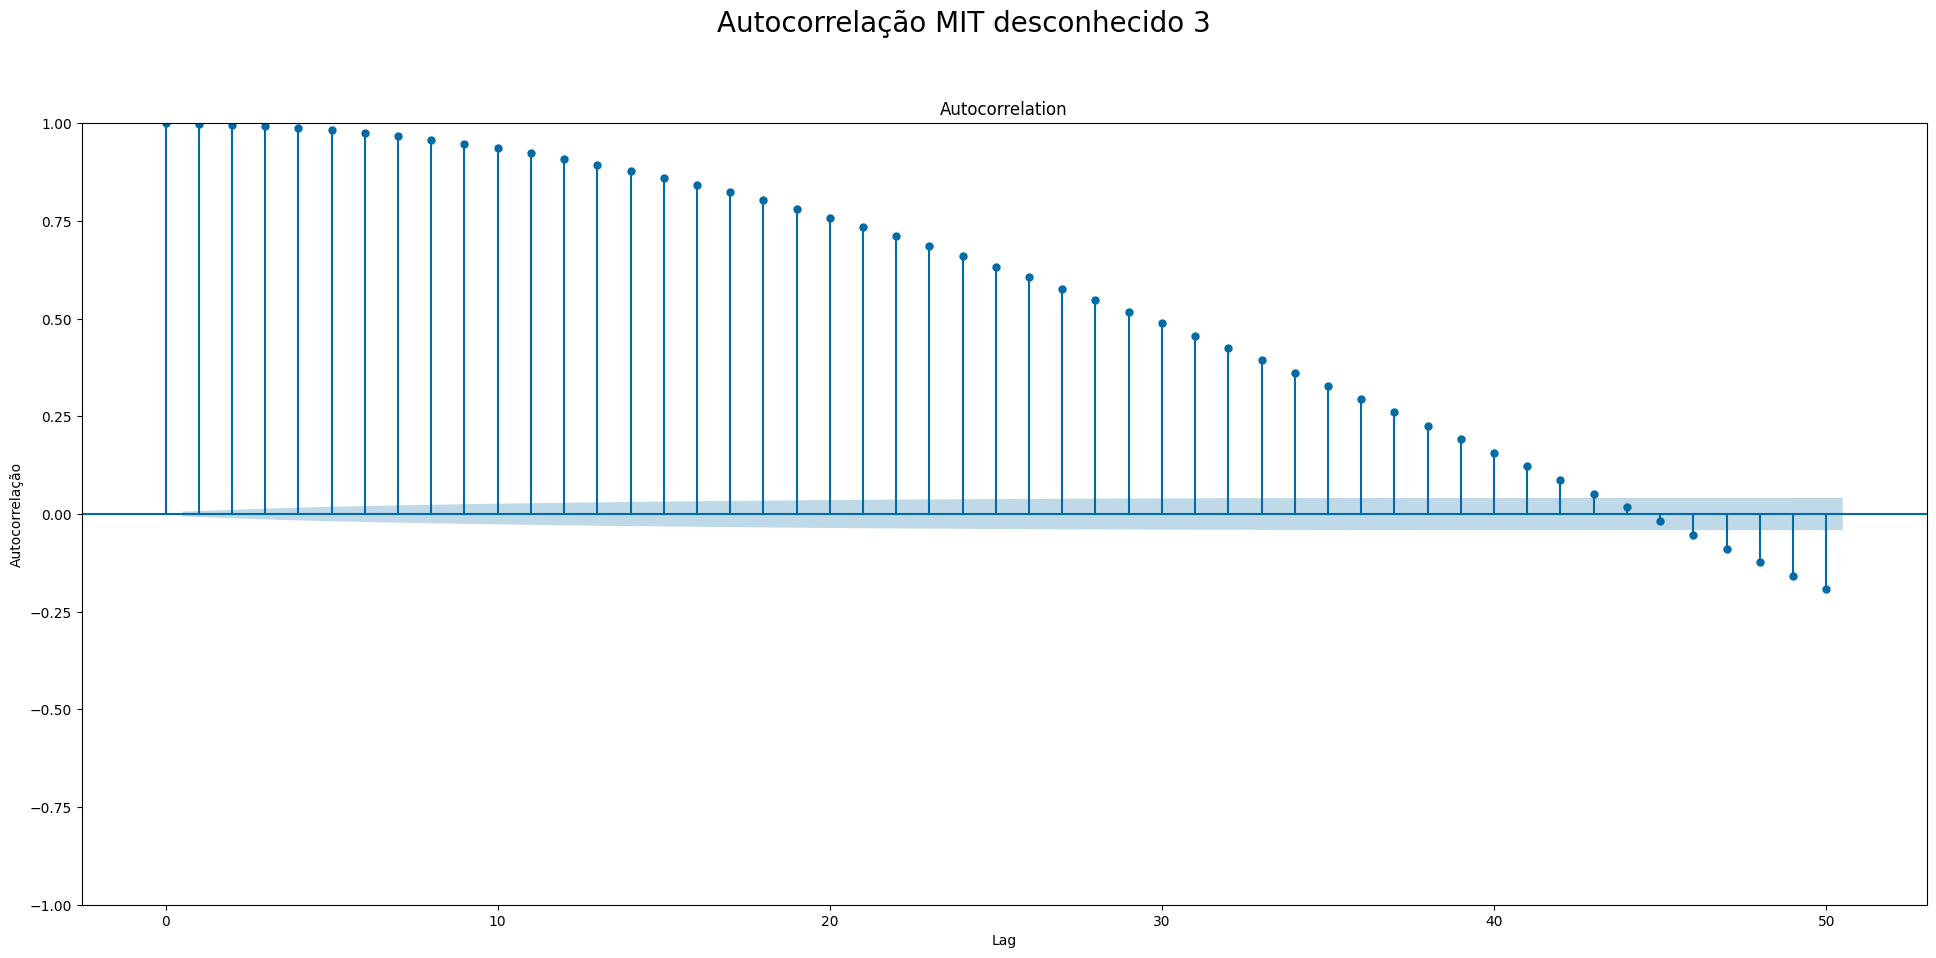

In [81]:
plot_autocorrelation2(unknown,"MIT desconhecido")

Outra opção https://scicoding.com/4-ways-of-calculating-autocorrelation-in-python/